<a href="https://colab.research.google.com/github/Dyouvrean/STATS-503-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
import missingno as msno
from collections import Counter
import xml.etree.ElementTree as ET
from datetime import datetime
pd.options.display.max_seq_items = 2000

# Load Data


*   tables_names - list all the table name in the database
*   Team_attribute
*   Team
*   League - league and country info
*   Match - Match table with 115 variables
*   Player - information about Player 



In [2]:
database = '/content/drive/MyDrive/STATS503/Project/database.sqlite'
conn = sql.connect(database)


tables_names = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables_names

type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7  CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...

In [3]:
team_attr=pd.read_sql("""SELECT *
                        FROM Team_Attributes"""
                        , conn)

team_attr.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [4]:
team=pd.read_sql("""SELECT *
                        FROM Team"""
                        , conn)

team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [5]:
league=pd.read_sql("""SELECT *
                        FROM Country C, League L
                        WHERE C.id= L.country_id;""", conn)
league= league.loc[:,~ league.columns.duplicated()].copy()
league

id         name  country_id
0       1      Belgium           1
1    1729      England        1729
2    4769       France        4769
3    7809      Germany        7809
4   10257        Italy       10257
5   13274  Netherlands       13274
6   15722       Poland       15722
7   17642     Portugal       17642
8   19694     Scotland       19694
9   21518        Spain       21518
10  24558  Switzerland       24558

In [6]:
Match = pd.read_sql("""SELECT * , C.name country, L.name League
                       FROM  Match M ,Country C, League L
                       WHERE C.id= L.country_id AND 
                             M.country_id=C.id AND M.league_id= L.id
                       ;""", conn)
Match = Match.loc[:,~Match.columns.duplicated()].copy()
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [7]:
Player = pd.read_sql("""SELECT DISTINCT * 
                       FROM  Player P, Player_Attributes PA
                       WHERE P.player_api_id= PA.player_api_id
                       ;""", conn)
Player

id  player_api_id         player_name  player_fifa_api_id  \
0           1         505942  Aaron Appindangoye              218353   
1           1         505942  Aaron Appindangoye              218353   
2           1         505942  Aaron Appindangoye              218353   
3           1         505942  Aaron Appindangoye              218353   
4           1         505942  Aaron Appindangoye              218353   
...       ...            ...                 ...                 ...   
183973  11075          39902  Zvjezdan Misimovic              102359   
183974  11075          39902  Zvjezdan Misimovic              102359   
183975  11075          39902  Zvjezdan Misimovic              102359   
183976  11075          39902  Zvjezdan Misimovic              102359   
183977  11075          39902  Zvjezdan Misimovic              102359   

                   birthday  height  weight      id  player_fifa_api_id  \
0       1992-02-29 00:00:00  182.88     187       1              218353   
1       1992-02-29 00:00:00  182.88     187       2              218353   
2       1992-02-29 00:00:00  182.88     187       3              218353   
3       1992-02-29 00:00:00  182.88     187       4              218353   
4       1992-02-29 00:00:00  182.88     187       5              218353   
...                     ...     ...     ...     ...                 ...   
183973  1982-06-05 00:00:00  180.34     176  183974              102359   
183974  1982-06-05 00:00:00  180.34     176  183975              102359   
183975  1982-06-05 00:00:00  180.34     176  183976              102359   
183976  1982-06-05 00:00:00  180.34     176  183977              102359   
183977  1982-06-05 00:00:00  180.34     176  183978              102359   

        player_api_id  ... vision  penalties  marking standing_tackle  \
0              505942  ...   54.0       48.0     65.0            69.0   
1              505942  ...   54.0       48.0     65.0            69.0   
2              505942  ...   54.0       48.0     65.0            66.0   
3              505942  ...   53.0       47.0     62.0            63.0   
4              505942  ...   53.0       47.0     62.0            63.0   
...               ...  ...    ...        ...      ...             ...   
183973          39902  ...   88.0       83.0     22.0            31.0   
183974          39902  ...   88.0       70.0     32.0            31.0   
183975          39902  ...   88.0       70.0     32.0            31.0   
183976          39902  ...   88.0       53.0     28.0            32.0   
183977          39902  ...   88.0       53.0     38.0            32.0   

       sliding_tackle gk_diving  gk_handling  gk_kicking  gk_positioning  \
0                69.0       6.0         11.0        10.0             8.0   
1                69.0       6.0         11.0        10.0             8.0   
2                69.0       6.0         11.0        10.0             8.0   
3                66.0       5.0         10.0         9.0             7.0   
4                66.0       5.0         10.0         9.0             7.0   
...               ...       ...          ...         ...             ...   
183973           30.0       9.0         20.0        84.0            20.0   
183974           30.0       9.0         20.0        73.0            20.0   
183975           30.0       9.0         20.0        73.0            20.0   
183976           30.0       9.0         20.0        73.0            20.0   
183977           30.0       9.0          9.0        78.0             7.0   

        gk_reflexes  
0               8.0  
1               8.0  
2               8.0  
3               7.0  
4               7.0  
...             ...  
183973         20.0  
183974         20.0  
183975         20.0  
183976         20.0  
183977         15.0  

[183978 rows x 49 columns]

In [8]:
Player = Player .loc[:,~Player .columns.duplicated()].copy()
Player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

# EDA

## Get the formation of team 
* get formation of the team 
* get the result of each match 
* process the xml string to list of dictionary structure

### Get the formation of the team 

In [9]:
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [10]:
def get_formation(row,home):
    home_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    away_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    formations = [None] * 2
    players_y=[home_players_y,away_players_y]
    for i in range(2):
        formation_dict=Counter(players_y[i]);
        sorted_keys = sorted(formation_dict)
        formation = ''
        for key in sorted_keys[1:-1]:
            y = formation_dict[key]
            formation += '%d-' % y
        formation += '%d' % formation_dict[sorted_keys[-1]] 
        formations[i] = formation
    return formations[home]

In [11]:
Match["home_form"]=Match.apply(lambda row: get_formation(row,0),axis=1)
Match["away_form"]=Match.apply(lambda row: get_formation(row,1),axis=1)
Match=Match.drop(['home_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['home_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['country_id','league_id'],axis=1)

### Get the result of each match

In [12]:
# assign match result by comparing the goals of home team and away team 
def match_result(row):
    if row['home_team_goal']> row['away_team_goal']:
      return "HOME"
    elif row['home_team_goal']<row['away_team_goal']:
      return "AWAY"
    else:
      return "DRAW"

In [13]:
Match['result']= Match.apply(lambda row: match_result(row),axis=1)

### process the xml string to list of dictionary structure

In [14]:
def converter(xml_string):
    if xml_string:
       tree = ET.ElementTree(ET.fromstring(xml_string))
       root=tree.getroot()
       data = []

            
       for child in root:
           element_data = {}
           for subelement in child:
               element_data[subelement.tag] = subelement.text
           data.append(element_data)
       return data
    return xml_string

In [15]:
Match[['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']]=Match[['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']].applymap(converter)

## imputation missing value

In [16]:
Match.isna().sum()[Match.isna().sum( )!=0]

home_player_1      1224
home_player_2      1315
home_player_3      1281
home_player_4      1323
home_player_5      1316
home_player_6      1325
home_player_7      1227
home_player_8      1309
home_player_9      1273
home_player_10     1436
home_player_11     1555
away_player_1      1234
away_player_2      1278
away_player_3      1293
away_player_4      1321
away_player_5      1335
away_player_6      1313
away_player_7      1235
away_player_8      1341
away_player_9      1328
away_player_10     1441
away_player_11     1554
goal              11762
shoton            11762
shotoff           11762
foulcommit        11762
card              11762
cross             11762
corner            11762
possession        11762
B365H              3387
B365D              3387
B365A              3387
BWH                3404
BWD                3404
BWA                3404
IWH                3459
IWD                3459
IWA                3459
LBH                3423
LBD                3423
LBA             

<Axes: >

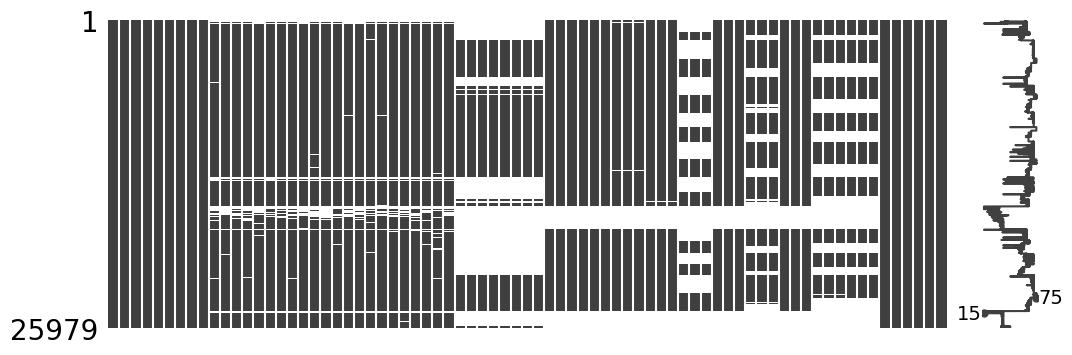

In [17]:
msno.matrix(Match, figsize=(12,4))

<Axes: >

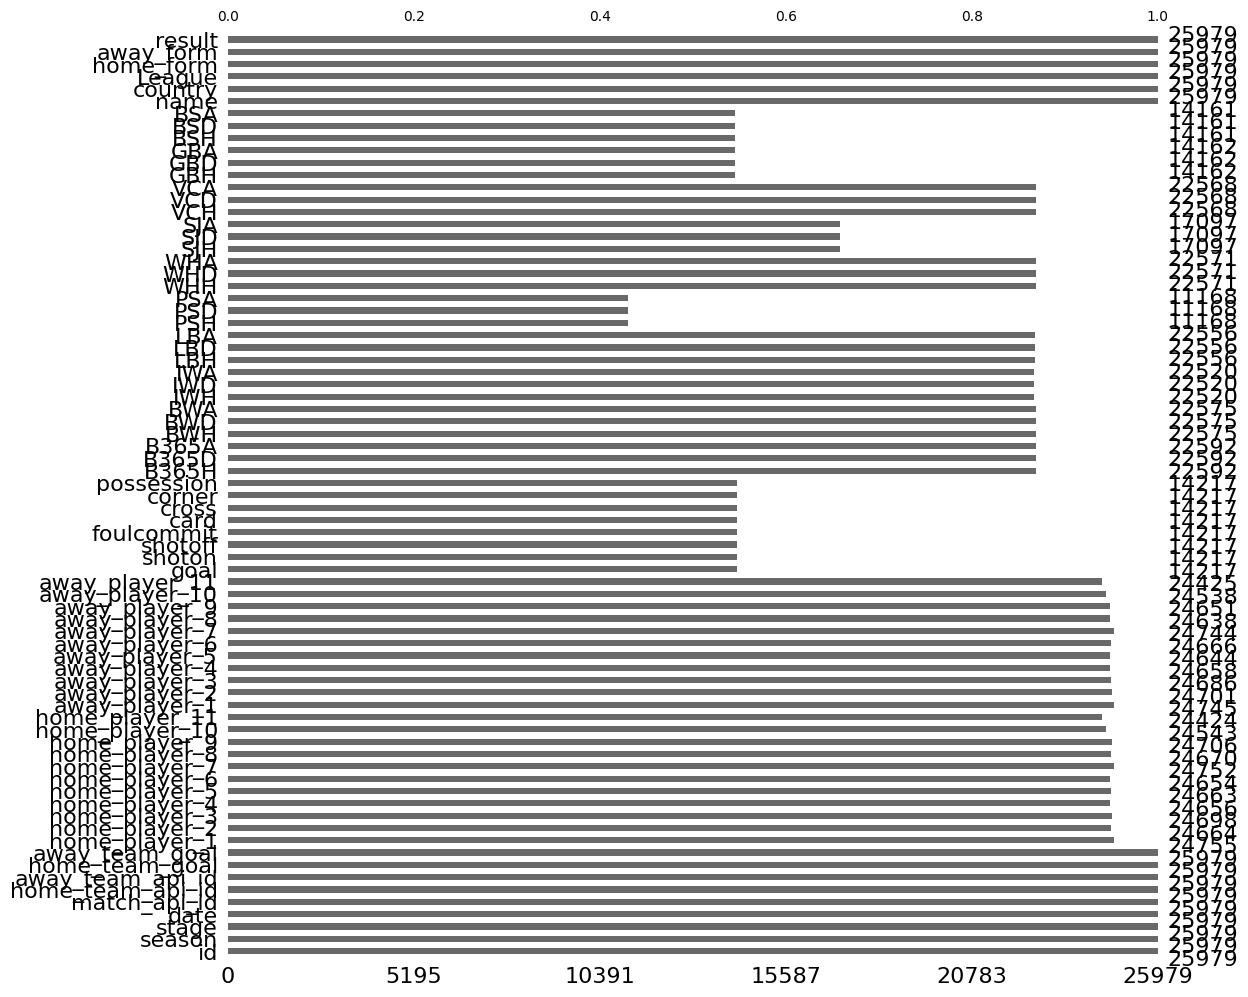

In [18]:
msno.bar(Match, figsize=(12,12))

### Delete the variables missing over 50% of records

In [19]:
null_list= Match.isnull().sum()
total_obs= len(Match)
radio=0.5
to_be_drop=null_list[null_list>total_obs*radio]
to_be_drop.index
Match=Match.drop(to_be_drop.index,axis=1)
Match.isna().sum()[Match.isna().sum( )!=0]

home_player_1      1224
home_player_2      1315
home_player_3      1281
home_player_4      1323
home_player_5      1316
home_player_6      1325
home_player_7      1227
home_player_8      1309
home_player_9      1273
home_player_10     1436
home_player_11     1555
away_player_1      1234
away_player_2      1278
away_player_3      1293
away_player_4      1321
away_player_5      1335
away_player_6      1313
away_player_7      1235
away_player_8      1341
away_player_9      1328
away_player_10     1441
away_player_11     1554
goal              11762
shoton            11762
shotoff           11762
foulcommit        11762
card              11762
cross             11762
corner            11762
possession        11762
B365H              3387
B365D              3387
B365A              3387
BWH                3404
BWD                3404
BWA                3404
IWH                3459
IWD                3459
IWA                3459
LBH                3423
LBD                3423
LBA             

### Drop the rows where players are missing 
From the graph above, the players with missing value is clustered, it is safe to drop the row.

In [20]:
Match=Match.dropna(subset = ['home_player_%d' % i for i in range(1,12)]+['away_player_%d' % i for i in range(1,12)])

## visualization of variable

#### visualized the table of match delete all player id 
* correlation plot

In [21]:
Match_no_player=Match.drop(['home_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['away_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['match_api_id','home_team_api_id','away_team_api_id','country','League','name','id','season','stage','date','home_form','away_form'],axis=1)
Match_bet=Match_no_player.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'],axis=1)
Match_no_player=Match_no_player.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession','result'],axis=1)
Match_no_player.columns

Index(['home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA'],
      dtype='object')

##### Clustered correlation

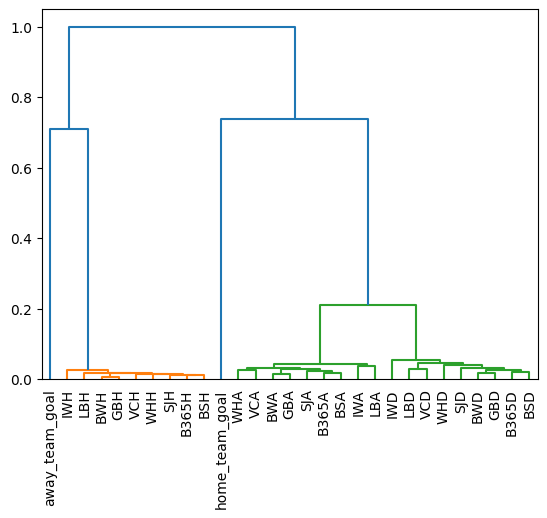

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

correlations = Match_no_player.corr()
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=Match_no_player.columns, orientation='top', 
           leaf_rotation=90);

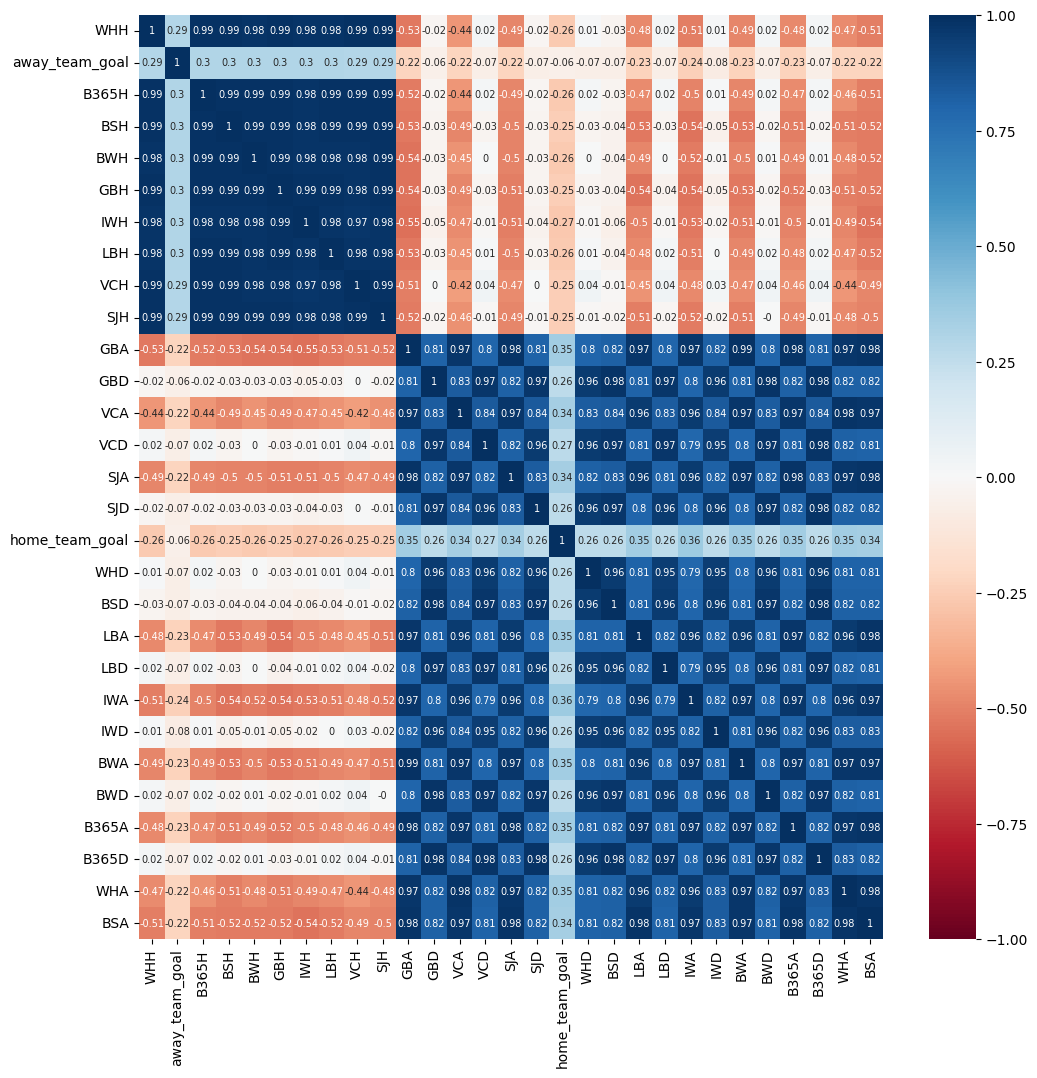

In [23]:
plt.figure(figsize = (12, 12))
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(Match_no_player.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(Match_no_player[i])
    else:
        df_to_append = pd.DataFrame(Match_no_player[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)
  
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

##### unclustered correlation

<Axes: >

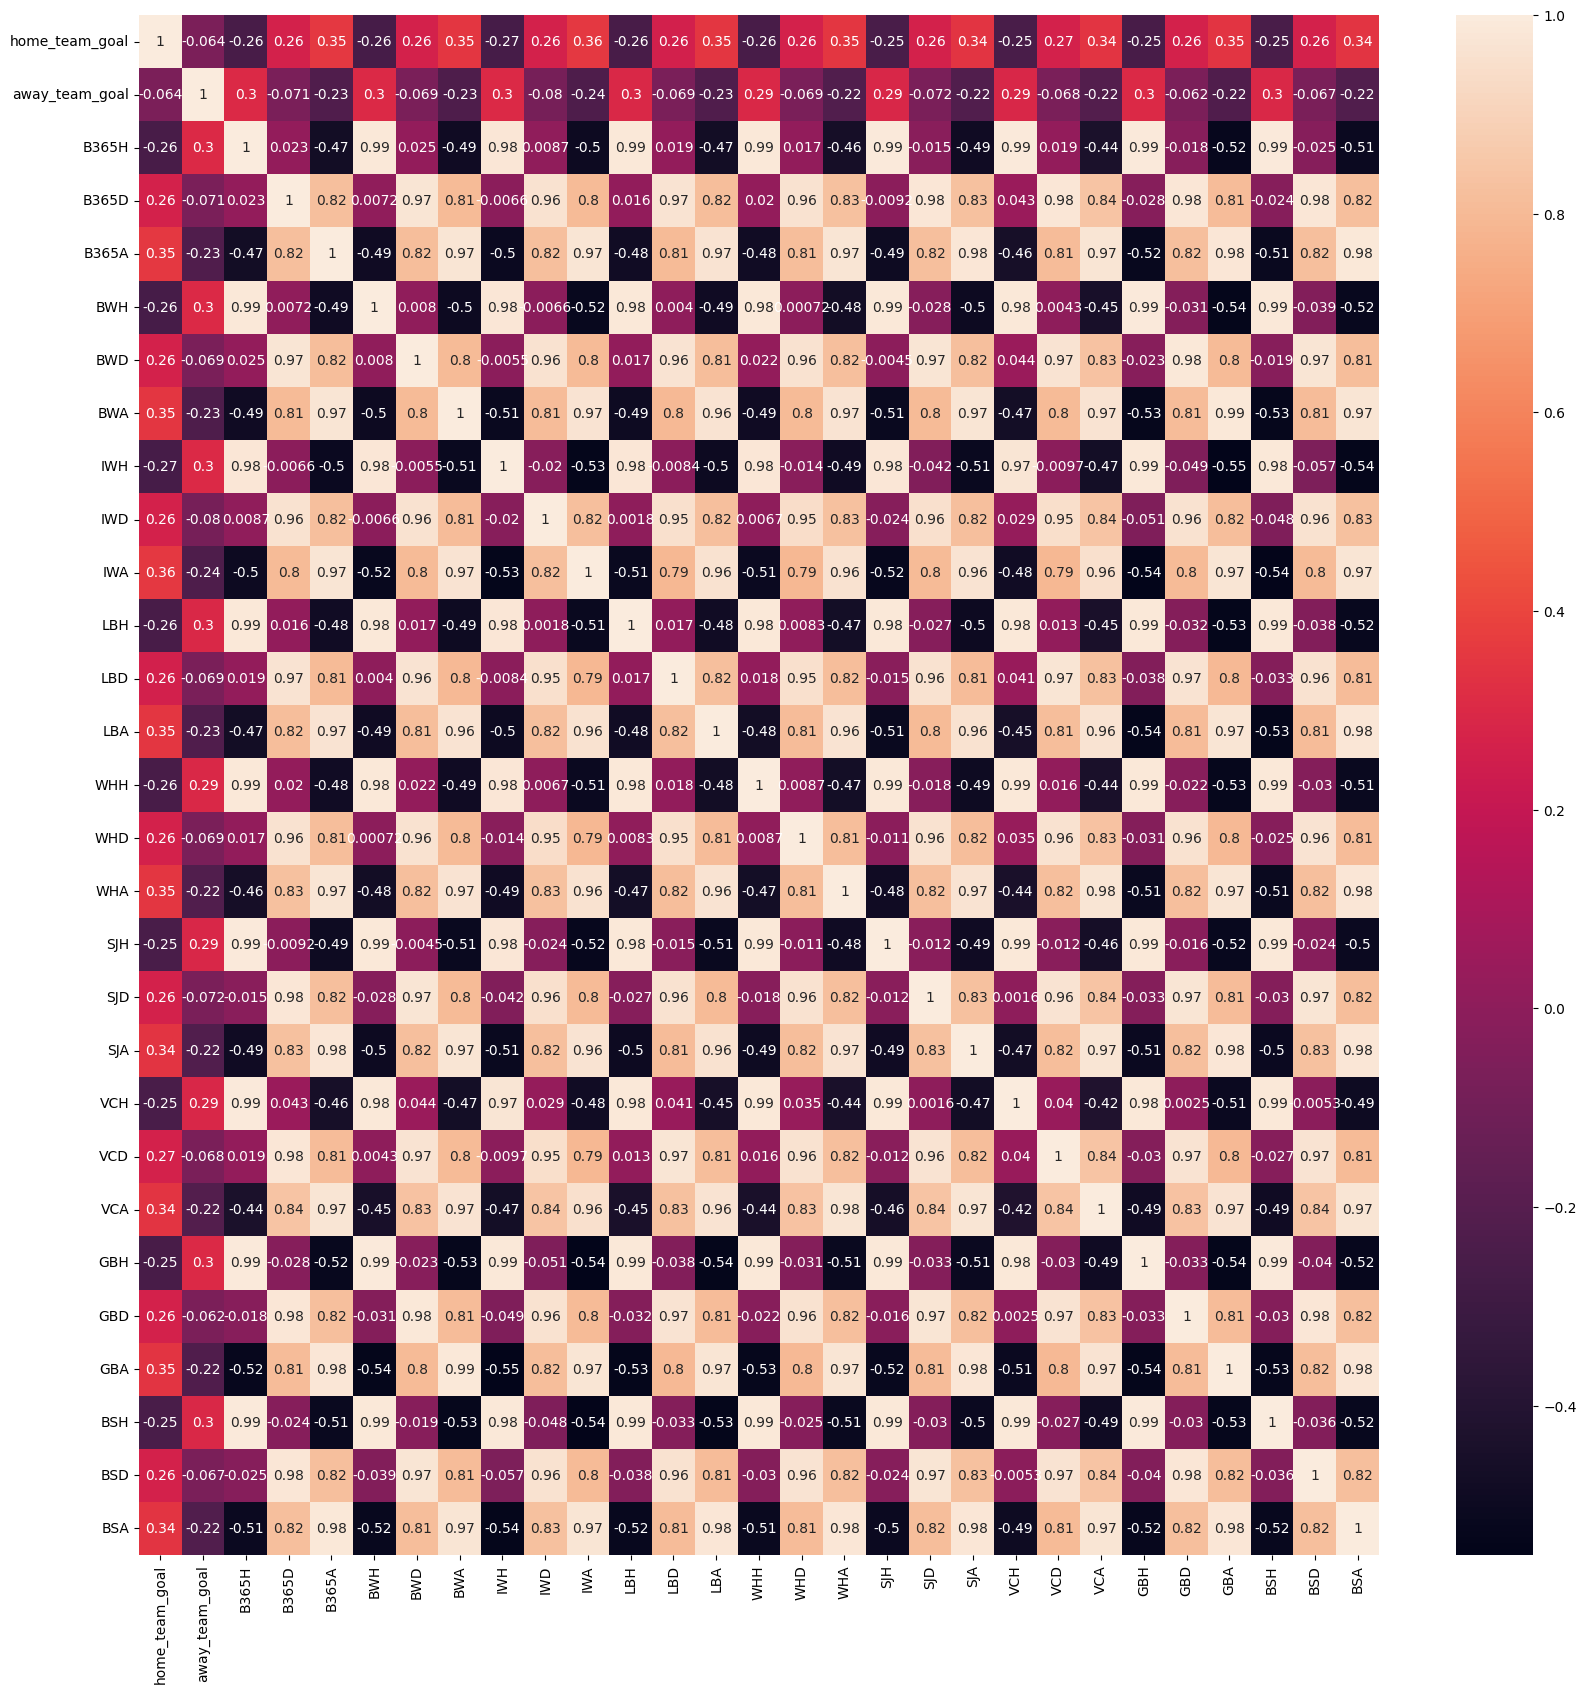

In [24]:
plt.figure(figsize = (20, 20))
sns.heatmap(Match_no_player.corr(), annot = True)

Since the correlation between the betting odds are high, use averge to reduce the features

##### average of betting odds of group(H,D,A)
* H - home tean win
* A- away team win
* D- Draw

preprocessing the null value in the betting odds data 

In [25]:
Match_bet.isnull().sum()

home_team_goal       0
away_team_goal       0
B365H             1683
B365D             1683
B365A             1683
BWH               1699
BWD               1699
BWA               1699
IWH               1739
IWD               1739
IWA               1739
LBH               1712
LBD               1712
LBA               1712
WHH               1696
WHD               1696
WHA               1696
SJH               6747
SJD               6747
SJA               6747
VCH               1705
VCD               1705
VCA               1705
GBH               9520
GBD               9520
GBA               9520
BSH               9518
BSD               9518
BSA               9518
result               0
dtype: int64

<Axes: >

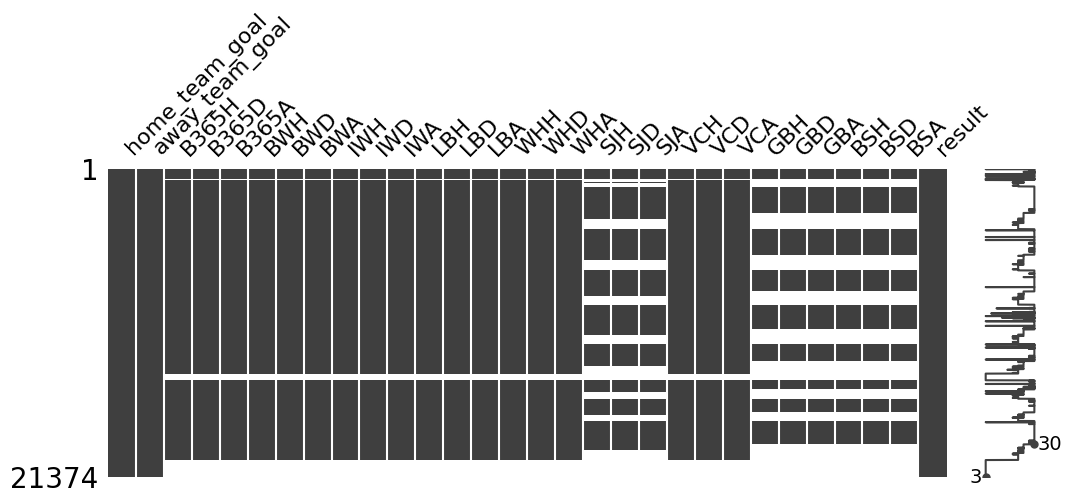

In [26]:
msno.matrix(Match_bet, figsize=(12,4))

In [27]:
target_cols = Match_bet.isna().sum()[Match_bet.isna().sum() > 4000].index.values

In [28]:
Match_bet = Match_bet.drop(target_cols, axis = 1)

In [29]:
Match_bet =Match_bet[~Match_bet.B365H.isna()]

In [30]:
H_odds = ["B365H", "BWH", "IWH", "LBH", "WHH", "VCH","result"]
D_odds = ["B365D", "BWD", "IWD", "LBD", "WHD", "VCD","result"]
A_odds = ["B365A", "BWA", "IWA", "LBA", "WHA", "VCA","result"]

In [31]:
bet_H= Match_bet[H_odds]
bet_D=Match_bet[D_odds]
bet_A= Match_bet[A_odds]

In [32]:
bet_H["H_avg"]=bet_H.apply(lambda row:np.mean(row[["B365H", "BWH", "IWH", "LBH", "WHH", "VCH"]]),axis=1)
bet_D["D_avg"]=bet_D.apply(lambda row:np.mean(row[["B365D", "BWD", "IWD", "LBD", "WHD", "VCD"]]),axis=1)
bet_A["A_avg"]=bet_A.apply(lambda row:np.mean(row[["B365A", "BWA", "IWA", "LBA", "WHA", "VCA"]]),axis=1)


<ipython-input-32-04278d54a315>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_H["H_avg"]=bet_H.apply(lambda row:np.mean(row[["B365H", "BWH", "IWH", "LBH", "WHH", "VCH"]]),axis=1)
<ipython-input-32-04278d54a315>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_D["D_avg"]=bet_D.apply(lambda row:np.mean(row[["B365D", "BWD", "IWD", "LBD", "WHD", "VCD"]]),axis=1)
<ipython-input-32-04278d54a315>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [33]:
bet_H['id'] = range(len(bet_H))
bet_D['id'] = range(len(bet_D))
bet_A['id'] = range(len(bet_A))

<ipython-input-33-be98d037f90e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_H['id'] = range(len(bet_H))
<ipython-input-33-be98d037f90e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_D['id'] = range(len(bet_D))
<ipython-input-33-be98d037f90e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [34]:
cor_res=["AWAY","HOME","DRAW"]
col_order=["A_avg","H_avg","D_avg"]
bet_total=pd.concat([bet_H[["H_avg","id","result"]], bet_A["A_avg"],bet_D["D_avg"]], axis=1)
bet_total["Min"]= bet_total.apply(lambda row: cor_res[np.argmin(row[col_order])],axis=1)
bet_total

H_avg     id result     A_avg     D_avg   Min
145    2.795000      0   HOME  2.258333  3.241667  AWAY
153    2.958333      1   AWAY  2.186667  3.150000  AWAY
155    1.353333      2   HOME  7.666667  4.141667  HOME
162    4.346667      3   HOME  1.720000  3.350000  AWAY
168    1.655000      4   DRAW  4.638333  3.433333  HOME
...         ...    ...    ...       ...       ...   ...
24552  1.591667  19686   HOME  6.400000  3.758333  HOME
24553  2.288333  19687   HOME  3.241667  3.208333  HOME
24554  1.550000  19688   HOME  6.566667  3.900000  HOME
24555  2.341667  19689   DRAW  3.083333  3.250000  HOME
24556  2.208333  19690   HOME  3.216667  3.433333  HOME

[19691 rows x 6 columns]

In [35]:
bet_total["Correct_guess"]= bet_total.apply(lambda row : "TRUE" if row["result"]== row["Min"] else "FALSE",axis=1)
betcompany=bet_total.groupby("Correct_guess").count().reset_index()
betcompany=betcompany.loc[:,["Correct_guess","Min"]].copy()
betcompany.columns=["Correct_guess","Count"]

In [36]:
betcompany

Correct_guess  Count
0         FALSE   9219
1          TRUE  10472

<Axes: xlabel='Correct_guess', ylabel='Count'>

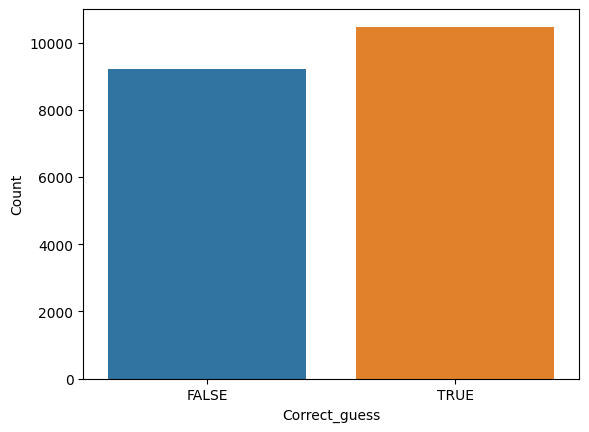

In [37]:
sns.barplot(betcompany,x="Correct_guess",y="Count")

<Axes: xlabel='result', ylabel='A_avg'>

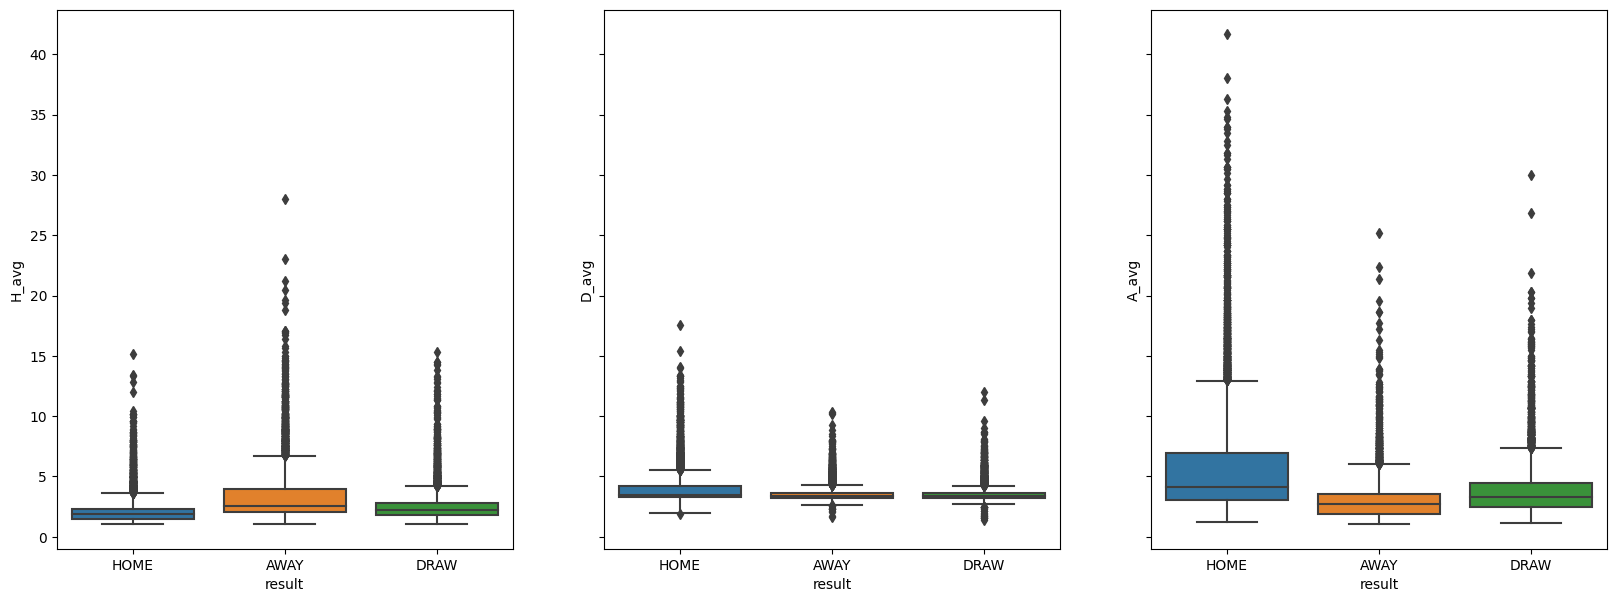

In [38]:
fig, axes = plt.subplots(1, 3, figsize = (20, 7), sharey = True)
sns.boxplot(data = bet_H, x = "result", y = "H_avg",ax = axes[0])
sns.boxplot(data = bet_D, x = "result", y = "D_avg",ax = axes[1])
sns.boxplot(data = bet_A, x = "result", y = "A_avg",ax = axes[2])

Due to the high correlation among the betting odds from 11 different company, each company provides home team win odd, away team win odd and draw odd. So, we break these 33 odds to corresponding win betting odds group and take average of them. For each match, the one with lowest betting odd is considered as the most likely win team by betting company. 

The betting company have more correct guess than the wrong guess by 6%

Also, the above box plot is intuitively true. 
Thus, according to these evidence, betting odds should be considered as a important feature

### Match result distribution 

#### general distribution of Match result

<Axes: xlabel='result', ylabel='Count'>

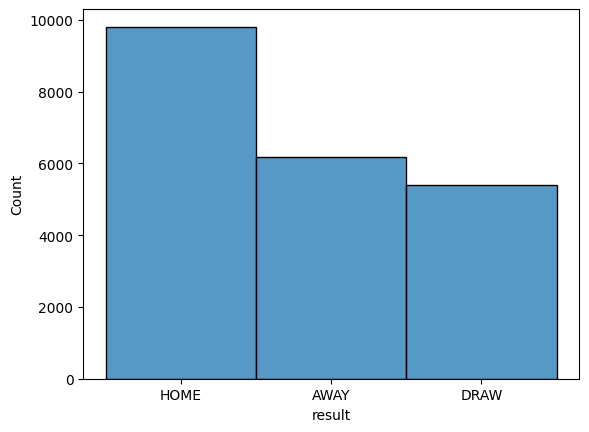

In [39]:
# Visulize the match result ,which is a little imbalanced  
sns.histplot(Match['result'])

From the plot above, it shows us that the Home team may have more chance to win

#### Match result of each league

In [40]:
match_hist=Match[["League","result"]].groupby("League").value_counts().reset_index()
match_hist.columns=["league","result","count"]
match_hist

league result  count
0     Belgium Jupiler League   HOME    568
1     Belgium Jupiler League   AWAY    347
2     Belgium Jupiler League   DRAW    300
3     England Premier League   HOME   1349
4     England Premier League   AWAY    847
5     England Premier League   DRAW    766
6             France Ligue 1   HOME   1289
7             France Ligue 1   DRAW    804
8             France Ligue 1   AWAY    771
9      Germany 1. Bundesliga   HOME   1078
10     Germany 1. Bundesliga   AWAY    719
11     Germany 1. Bundesliga   DRAW    579
12             Italy Serie A   HOME   1280
13             Italy Serie A   AWAY    745
14             Italy Serie A   DRAW    722
15    Netherlands Eredivisie   HOME    963
16    Netherlands Eredivisie   AWAY    593
17    Netherlands Eredivisie   DRAW    479
18        Poland Ekstraklasa   HOME    217
19        Poland Ekstraklasa   DRAW    130
20        Poland Ekstraklasa   AWAY    122
21  Portugal Liga ZON Sagres   HOME    566
22  Portugal Liga ZON Sagres   AWAY    381
23  Portugal Liga ZON Sagres   DRAW    333
24   Scotland Premier League   HOME    655
25   Scotland Premier League   AWAY    521
26   Scotland Premier League   DRAW    365
27           Spain LIGA BBVA   HOME   1313
28           Spain LIGA BBVA   AWAY    761
29           Spain LIGA BBVA   DRAW    633
30  Switzerland Super League   HOME    532
31  Switzerland Super League   AWAY    359
32  Switzerland Super League   DRAW    287

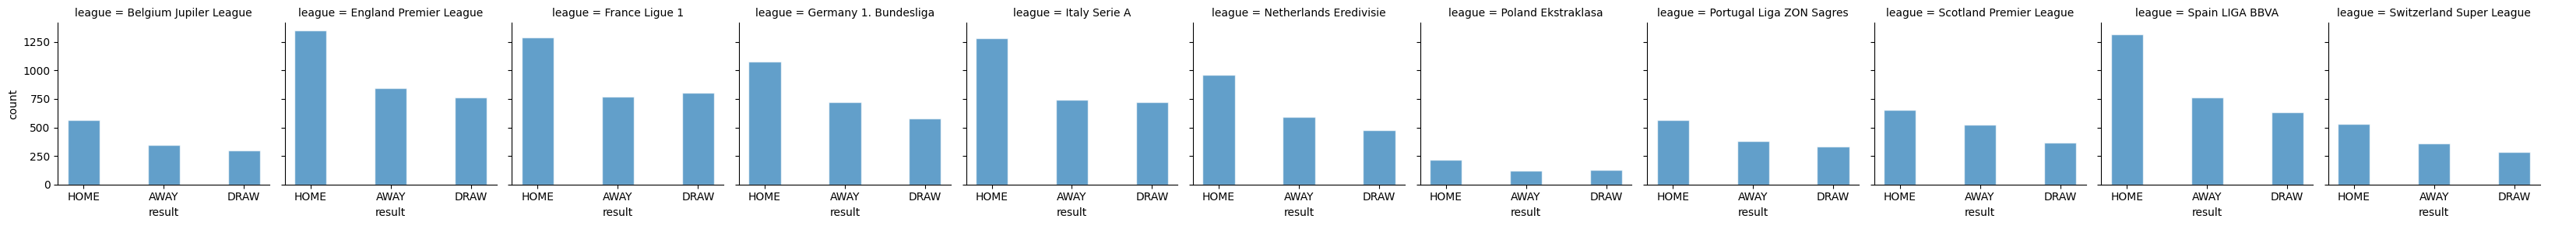

In [41]:
graph = sns.FacetGrid(match_hist, col ="league")
graph.map(plt.bar ,"result","count",edgecolor ="w",alpha=0.7,width=0.4).add_legend()
plt.show()

<Axes: xlabel='Count', ylabel='League'>

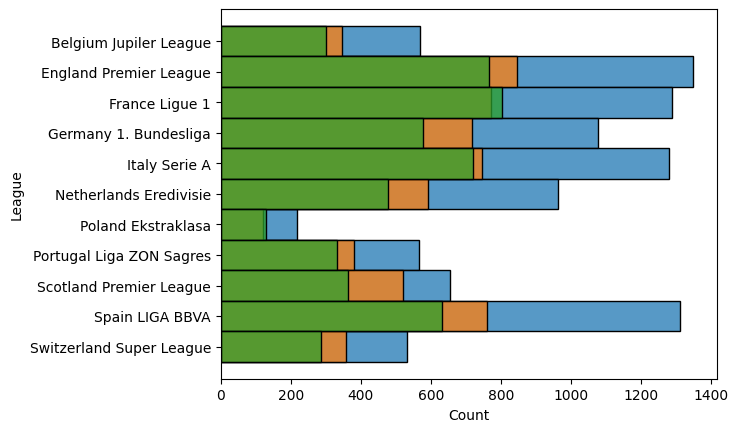

In [42]:
sns.histplot(Match[["League","result"]][Match[["League","result"]].result=="HOME"], y= "League")
sns.histplot(Match[["League","result"]][Match[["League","result"]].result=="AWAY"], y= "League")
sns.histplot(Match[["League","result"]][Match[["League","result"]].result=="DRAW"], y= "League")

As the plot showed above, for all leagues, the home tean is more likely to win.

#### check if there is correlation between sum of player score and win rate

In [43]:
player_in_match=Match[['home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2',
       'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11','date']]

In [44]:
Player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [45]:
def cal_player_rating(row):
    date=pd.to_datetime(row['date'])
    home=[row['home_player_%d' % i] for i in range(1,12)]
    away=[row['away_player_%d' % i] for i in range(1,12)]
    home_pd= Player[Player.player_api_id.isin(home)][["overall_rating","date",'player_api_id']]
    home_pd['recent']= abs(pd.to_datetime(home_pd['date'])-date)
    away_pd= Player[Player.player_api_id.isin(away)][["overall_rating","date",'player_api_id']]
    away_pd['recent']= abs(pd.to_datetime(away_pd['date'])-date)
    home_score= sum(home_pd.groupby("player_api_id").min().reset_index()["overall_rating"])
    away_score= sum(away_pd.groupby("player_api_id").min().reset_index()["overall_rating"])

    return home_score,away_score

In [46]:
cal_player_rating(player_in_match.iloc[0])

Match["home_score"]=Match.apply(lambda row: cal_player_rating(row)[0],axis=1)
Match["away_score"]=Match.apply(lambda row: cal_player_rating(row)[1],axis=1)
Match

id     season  stage                 date  match_api_id  \
145      146  2008/2009     24  2009-02-27 00:00:00        493017   
153      154  2008/2009     25  2009-03-08 00:00:00        493025   
155      156  2008/2009     25  2009-03-07 00:00:00        493027   
162      163  2008/2009     26  2009-03-13 00:00:00        493034   
168      169  2008/2009     26  2009-03-14 00:00:00        493040   
...      ...        ...    ...                  ...           ...   
25972  25973  2015/2016      8  2015-09-13 00:00:00       1992089   
25974  25975  2015/2016      9  2015-09-22 00:00:00       1992091   
25975  25976  2015/2016      9  2015-09-23 00:00:00       1992092   
25976  25977  2015/2016      9  2015-09-23 00:00:00       1992093   
25978  25979  2015/2016      9  2015-09-23 00:00:00       1992095   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
145                8203              9987               2               1   
153                9984              8342               1               3   
155                8635             10000               2               0   
162                8203              8635               2               1   
168               10000              9999               0               0   
...                 ...               ...             ...             ...   
25972             10243             10191               3               3   
25974             10190             10191               1               0   
25975              9824             10199               1               2   
25976              9956             10179               2               0   
25978             10192              9931               4               3   

       home_player_1  ...  BSD   BSA         name      country  \
145          38327.0  ...  3.2  2.25      Belgium      Belgium   
153          36835.0  ...  3.2  2.38      Belgium      Belgium   
155          34480.0  ...  4.2  7.00      Belgium      Belgium   
162          38327.0  ...  3.3  1.75      Belgium      Belgium   
168          37900.0  ...  3.4  4.33      Belgium      Belgium   
...              ...  ...  ...   ...          ...          ...   
25972       274776.0  ...  NaN   NaN  Switzerland  Switzerland   
25974        42231.0  ...  NaN   NaN  Switzerland  Switzerland   
25975        33272.0  ...  NaN   NaN  Switzerland  Switzerland   
25976       157856.0  ...  NaN   NaN  Switzerland  Switzerland   
25978       274787.0  ...  NaN   NaN  Switzerland  Switzerland   

                         League  home_form  away_form  result  home_score  \
145      Belgium Jupiler League      4-4-2      4-4-2    HOME       639.0   
153      Belgium Jupiler League      4-4-2      4-4-2    AWAY       689.0   
155      Belgium Jupiler League      4-4-2      4-4-2    HOME       723.0   
162      Belgium Jupiler League      4-4-2      4-4-2    HOME       641.0   
168      Belgium Jupiler League      4-4-2      4-4-2    DRAW       654.0   
...                         ...        ...        ...     ...         ...   
25972  Switzerland Super League      4-4-2      4-4-2    DRAW       605.0   
25974  Switzerland Super League    4-2-3-1    4-2-3-1    HOME       602.0   
25975  Switzerland Super League    3-4-1-2    3-4-1-2    AWAY       619.0   
25976  Switzerland Super League    4-2-3-1    4-2-3-1    HOME       642.0   
25978  Switzerland Super League      4-4-2      4-4-2    HOME       656.0   

       away_score  
145         663.0  
153         710.0  
155         639.0  
162         727.0  
168         639.0  
...           ...  
25972       625.0  
25974       620.0  
25975       618.0  
25976       650.0  
25978       648.0  

[21374 rows x 74 columns]

<Axes: xlabel='id', ylabel='away_score'>

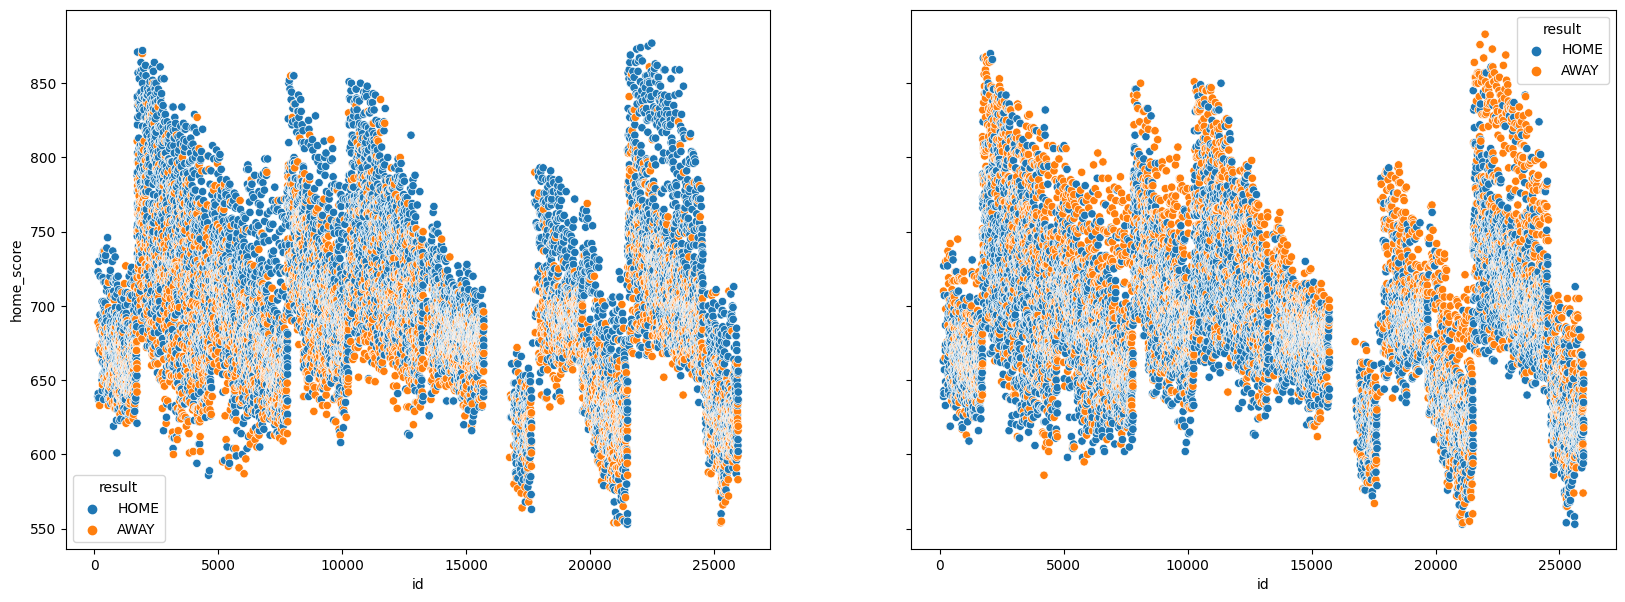

In [47]:
# sns.scatterplot(Match,y="home_score",x='date', hue ='result')

# graph = sns.FacetGrid(Match, col ="League",  hue ="result", col_wrap=3)
# graph.map(plt.scatter ,"League",'home_score',edgecolor ="w").add_legend()
# plt.show()
fig, axes = plt.subplots(1, 2, figsize = (20, 7), sharey = True)

sns.scatterplot(data=Match[Match.result!="DRAW"],x="id",y="home_score",hue="result",ax = axes[0])
sns.scatterplot(data=Match[Match.result!="DRAW"],x="id",y="away_score",hue="result",ax = axes[1])

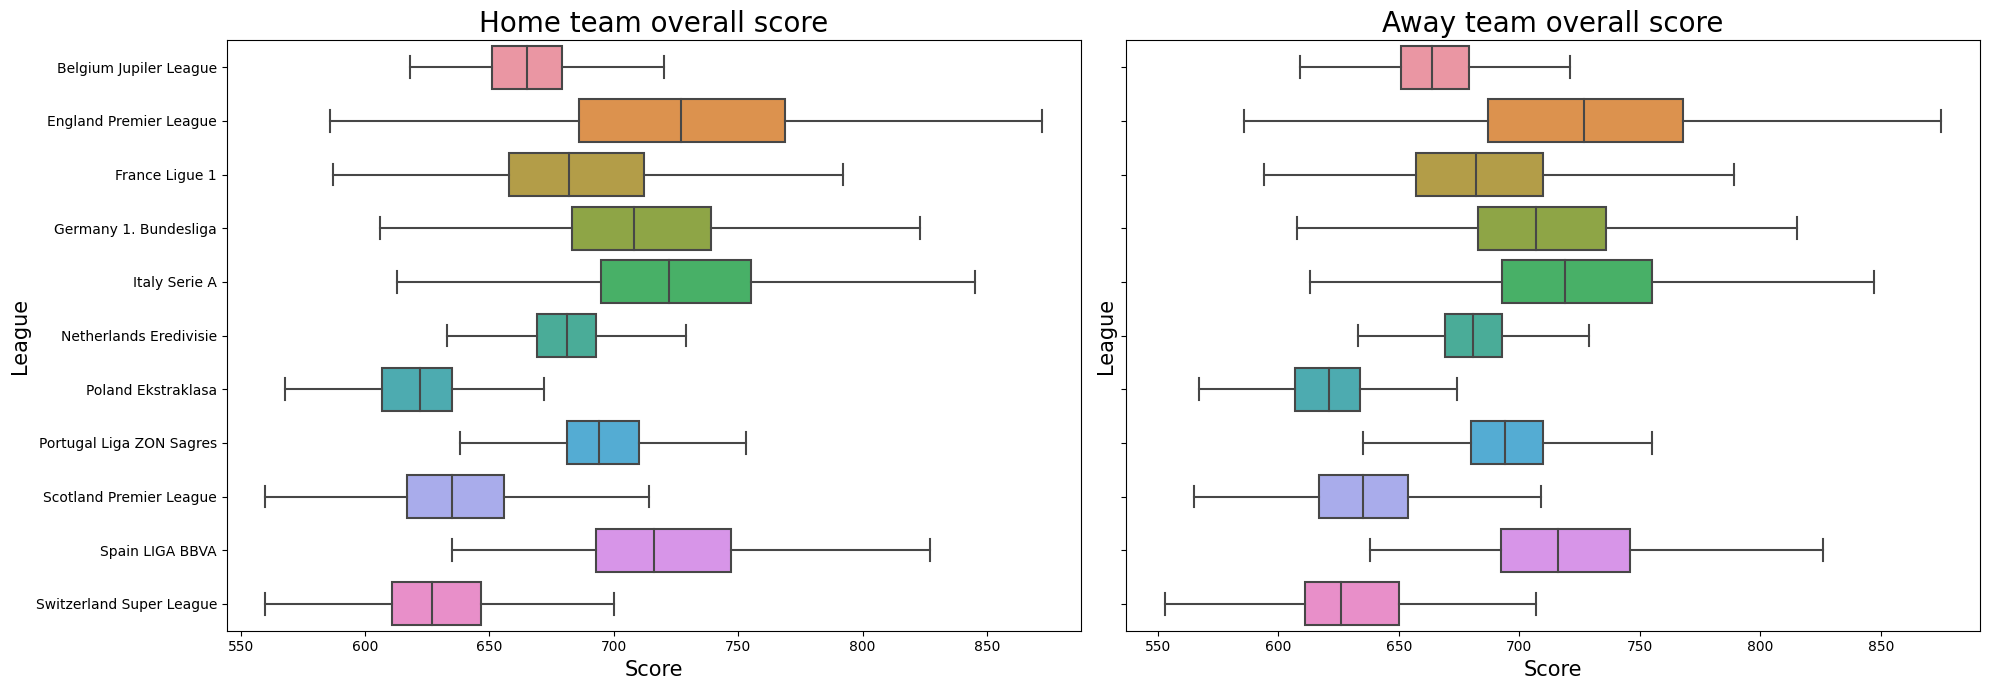

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7), sharey = True)
sns.boxplot(data = Match, x = "home_score", y = "League", showfliers = False, ax = axes[0])
axes[0].set_xlabel("Score", fontsize = 15)
axes[0].set_ylabel("League", fontsize = 15)
axes[0].set_title("Home team overall score", fontsize = 20)

sns.boxplot(data = Match, x = "away_score", y = "League", showfliers = False, ax = axes[1])
axes[1].set_xlabel("Score", fontsize = 15)
axes[1].set_ylabel("League", fontsize = 15)
axes[1].set_title("Away team overall score", fontsize = 20)
plt.tight_layout()

From the plot above, the overall score of player don't have large difference

In [49]:
Score= Match.loc[:,["home_score","id","League","result"]]
Score["pos"]="home"

Score_away= Match.loc[:,["away_score","id","League","result"]]
Score_away["pos"]="away"

Score.columns=["Score","id","League","result","pos"]
Score_away.columns=["Score","id","League","result","pos"]
Score_total=pd.concat([Score, Score_away])

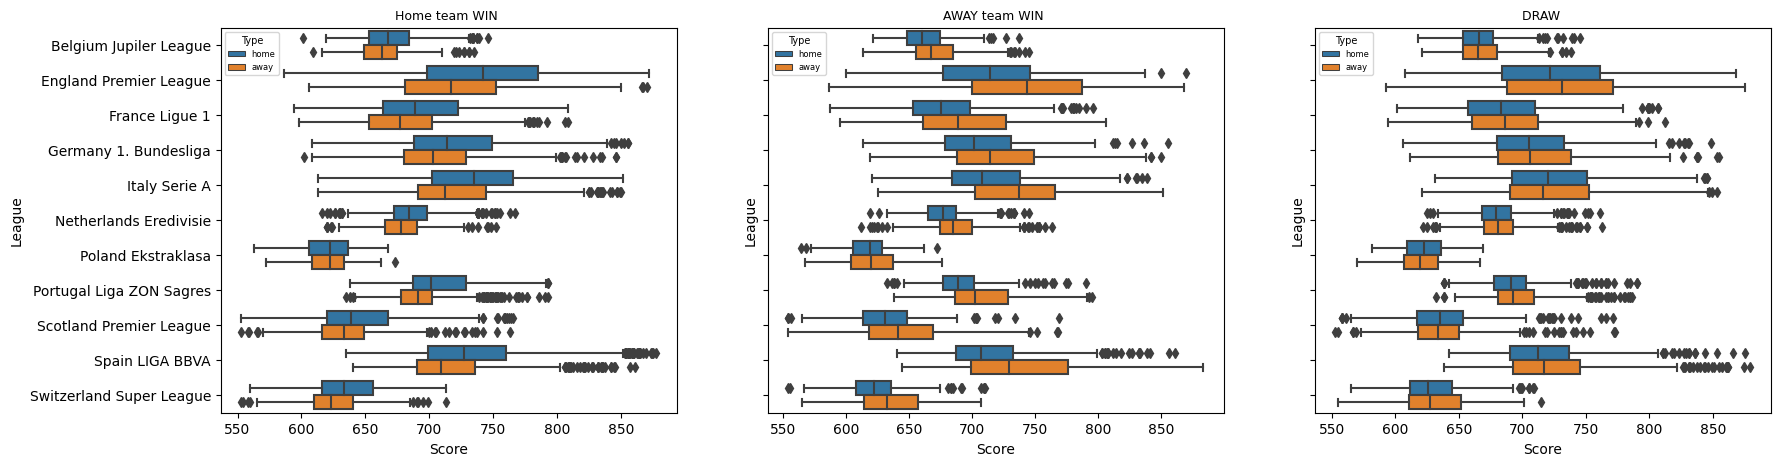

In [50]:
# sns.scatterplot(Score_total,y="Score",x='id', hue ='pos')
fig, axes = plt.subplots(1, 3, figsize = (20, 5), sharey = True)
sns.boxplot(data =Score_total[Score_total.result=="HOME"], x = "Score", y = "League", hue="pos",ax = axes[0])
axes[0].legend(title='Type', fontsize='6', title_fontsize='7')
axes[0].set_title("Home team WIN ", fontsize = 9)
sns.boxplot(data =Score_total[Score_total.result=="AWAY"], x = "Score", y = "League", hue="pos",ax = axes[1])
axes[1].set_title("AWAY team WIN ", fontsize = 9)
axes[1].legend(title='Type', fontsize='6', title_fontsize='7')
sns.boxplot(data =Score_total[Score_total.result=="DRAW"], x = "Score", y = "League", hue="pos",ax = axes[2])
axes[2].set_title("DRAW ", fontsize = 9)
axes[2].legend(title='Type', fontsize='6', title_fontsize='7')

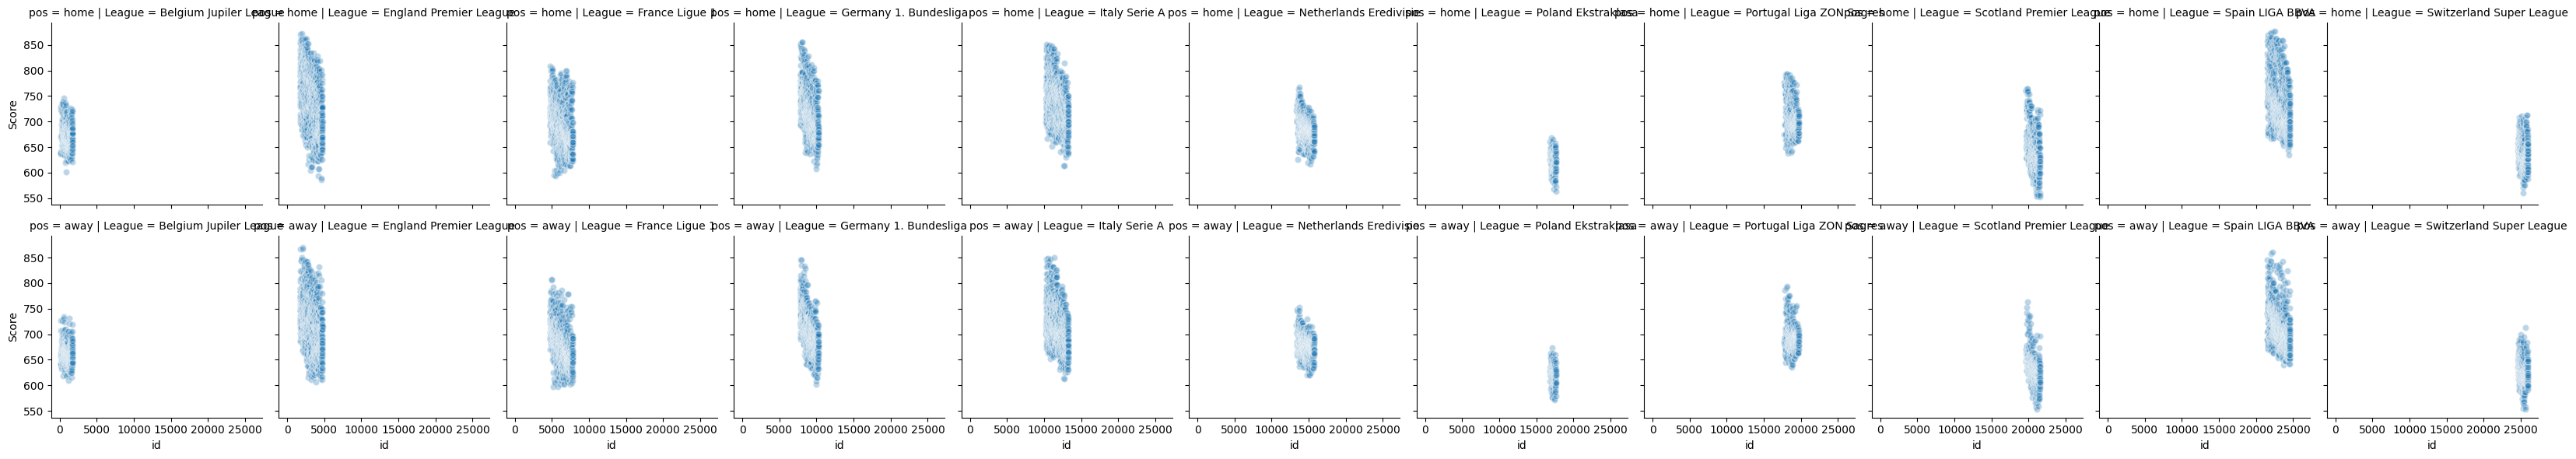

In [51]:
graph = sns.FacetGrid(Score_total[Score_total.result=="HOME"], col ="League", row="pos")
graph.map(plt.scatter ,"id",'Score',edgecolor ="w",alpha=0.3).add_legend()
plt.show()


However, after partition the all match into 3 parts by match result, it shows that the overall score of player fromwinning team is slightly better than the other one. As for the DRAW plot, the overall score looks similar. Thus, we consider the player overall score is a relative feature.

#### check the formation of team 

In [52]:
Match_form= Match[["League",'home_form','away_form','result']]

In [53]:
Match_form.groupby(["League",'home_form','away_form']).count().reset_index()

League home_form away_form  result
0      Belgium Jupiler League   3-3-3-1   3-3-3-1       2
1      Belgium Jupiler League   3-4-1-2   3-4-1-2       8
2      Belgium Jupiler League     3-4-3     3-4-3      59
3      Belgium Jupiler League   3-5-1-1   3-5-1-1       2
4      Belgium Jupiler League     3-5-2     3-5-2      87
..                        ...       ...       ...     ...
188  Switzerland Super League   4-3-2-1   4-3-2-1       7
189  Switzerland Super League     4-3-3     4-3-3      51
190  Switzerland Super League   4-4-1-1   4-4-1-1       5
191  Switzerland Super League     4-4-2     4-4-2     515
192  Switzerland Super League     4-5-1     4-5-1     200

[193 rows x 4 columns]

In [54]:
np.sum(Match_form["home_form"]!=Match_form["away_form"])

0

After exploring the formation data, it occurs that along all the match, the formation of home team and away team are the same. Thus, the formation info may not useful, which will not be used in prediction

#### The team who win most number of match and who win most 

##### compare all the team 

In [55]:
Match.columns

Index(['id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2',
       'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA', 'name', 'country', 'League', 'home_form',
       'away_form', 'result', 'home_score', 'away_score'],
      dtype='object')

In [56]:
Match_team= Match[['home_team_api_id','away_team_api_id','result','League']]

In [57]:
team_name= team[["team_api_id","team_long_name"]]

In [58]:
home_team_name=team_name.copy()
home_team_name.columns=["home_team_api_id","home_team_long_name"]
home_team_name

away_team_name=team_name.copy()
away_team_name.columns=["away_team_api_id","away_team_long_name"]
away_team_name

away_team_api_id away_team_long_name
0                9987            KRC Genk
1                9993        Beerschot AC
2               10000    SV Zulte-Waregem
3                9994    Sporting Lokeren
4                9984   KSV Cercle Brugge
..                ...                 ...
294             10190       FC St. Gallen
295             10191             FC Thun
296              9777         Servette FC
297              7730  FC Lausanne-Sports
298              7896              Lugano

[299 rows x 2 columns]

In [59]:
Match_team= pd.merge(Match_team, home_team_name, how='inner', on = 'home_team_api_id')
Match_team= pd.merge(Match_team, away_team_name, how='inner', on = 'away_team_api_id')
Match_team

home_team_api_id  away_team_api_id result                    League  \
0                  8203              9987   HOME    Belgium Jupiler League   
1                  8203              9987   DRAW    Belgium Jupiler League   
2                  8203              9987   HOME    Belgium Jupiler League   
3                  8203              9987   HOME    Belgium Jupiler League   
4                  8203              9987   HOME    Belgium Jupiler League   
...                 ...               ...    ...                       ...   
21369              9956              7896   AWAY  Switzerland Super League   
21370              9824              7896   DRAW  Switzerland Super League   
21371              9824              7896   DRAW  Switzerland Super League   
21372             10190              7896   DRAW  Switzerland Super League   
21373             10191              7896   HOME  Switzerland Super League   

           home_team_long_name away_team_long_name  
0                  KV Mechelen            KRC Genk  
1                  KV Mechelen            KRC Genk  
2                  KV Mechelen            KRC Genk  
3                  KV Mechelen            KRC Genk  
4                  KV Mechelen            KRC Genk  
...                        ...                 ...  
21369  Grasshopper Club Zürich              Lugano  
21370                 FC Vaduz              Lugano  
21371                 FC Vaduz              Lugano  
21372            FC St. Gallen              Lugano  
21373                  FC Thun              Lugano  

[21374 rows x 6 columns]

In [60]:
def get_winner(row):
  if row["result"]== "HOME":
     return row["home_team_long_name"]
  elif row["result"]== "AWAY":
     return row["away_team_long_name"]
  else:
    return "TIE"

In [61]:
Match_team["Winner"]=Match_team.apply(lambda row: get_winner(row),axis=1)

In [62]:
win_dict=Match_team["Winner"].value_counts().to_dict()

In [63]:
home_dict=Match_team["home_team_long_name"].value_counts().to_dict()
home_dict

{'Arsenal': 151,
 'Chelsea': 151,
 'Paris Saint-Germain': 150,
 'Liverpool': 150,
 'Manchester United': 149,
 'Stoke City': 149,
 'Everton': 149,
 'Girondins de Bordeaux': 148,
 'Aston Villa': 148,
 'Tottenham Hotspur': 148,
 'Olympique Lyonnais': 147,
 'Sevilla FC': 147,
 'Manchester City': 147,
 'Stade Rennais FC': 146,
 'Olympique de Marseille': 146,
 'LOSC Lille': 145,
 'OGC Nice': 144,
 'FC Lorient': 144,
 'Udinese': 144,
 'Genoa': 144,
 'Milan': 143,
 'Napoli': 143,
 'Juventus': 143,
 'Valencia CF': 142,
 'Roma': 142,
 'Sunderland': 142,
 'Atlético Madrid': 140,
 'Toulouse FC': 139,
 'AS Saint-Étienne': 139,
 'Real Madrid CF': 138,
 'Fiorentina': 138,
 'RCD Espanyol': 138,
 'Lazio': 137,
 'Celtic': 137,
 'Inter': 137,
 'FC Bayern Munich': 136,
 'Getafe CF': 136,
 'Athletic Club de Bilbao': 136,
 'VfL Wolfsburg': 135,
 'Málaga CF': 135,
 'Chievo Verona': 134,
 'SV Werder Bremen': 134,
 'VfB Stuttgart': 133,
 'Bayer 04 Leverkusen': 133,
 'Hamburger SV': 133,
 'Borussia Dortmund': 1

In [64]:
away_dict=Match_team["away_team_long_name"].value_counts().to_dict()
away_dict

{'Stoke City': 151,
 'Tottenham Hotspur': 151,
 'Manchester United': 151,
 'Everton': 150,
 'Liverpool': 150,
 'Aston Villa': 150,
 'Arsenal': 150,
 'Chelsea': 149,
 'Girondins de Bordeaux': 148,
 'Olympique de Marseille': 147,
 'OGC Nice': 146,
 'Stade Rennais FC': 146,
 'LOSC Lille': 146,
 'Fiorentina': 145,
 'Milan': 145,
 'Roma': 145,
 'FC Lorient': 145,
 'Paris Saint-Germain': 145,
 'Real Madrid CF': 144,
 'Manchester City': 144,
 'Atlético Madrid': 144,
 'Toulouse FC': 144,
 'Juventus': 144,
 'Udinese': 144,
 'Olympique Lyonnais': 143,
 'Sunderland': 142,
 'Napoli': 142,
 'AS Saint-Étienne': 141,
 'Valencia CF': 140,
 'Sevilla FC': 140,
 'Athletic Club de Bilbao': 139,
 'FC Barcelona': 139,
 'Inter': 139,
 'Celtic': 136,
 'Chievo Verona': 136,
 'FC Schalke 04': 135,
 'VfB Stuttgart': 135,
 'Málaga CF': 135,
 'Aberdeen': 134,
 'Hamburger SV': 134,
 'Genoa': 134,
 'Borussia Dortmund': 134,
 'RCD Espanyol': 134,
 'Getafe CF': 133,
 'TSG 1899 Hoffenheim': 133,
 'FC Bayern Munich': 13

In [65]:
win_rate={}
match_counts={}
league_dict={}
for key,value in home_dict.items():
    num_match= value+away_dict[key]
    league_dict[key]=Match_team[Match_team["home_team_long_name"]==key]["League"].unique()[0]
    match_counts[key]= num_match
    if key in win_dict.keys():
      win_rate[key]=win_dict[key]/num_match
    else:
      win_rate[key]=0

win_rate

{'Arsenal': 0.5581395348837209,
 'Chelsea': 0.5733333333333334,
 'Paris Saint-Germain': 0.5728813559322034,
 'Liverpool': 0.49,
 'Manchester United': 0.6266666666666667,
 'Stoke City': 0.3233333333333333,
 'Everton': 0.391304347826087,
 'Girondins de Bordeaux': 0.40540540540540543,
 'Aston Villa': 0.2785234899328859,
 'Tottenham Hotspur': 0.4916387959866221,
 'Olympique Lyonnais': 0.496551724137931,
 'Sevilla FC': 0.4425087108013937,
 'Manchester City': 0.570446735395189,
 'Stade Rennais FC': 0.3732876712328767,
 'Olympique de Marseille': 0.4709897610921502,
 'LOSC Lille': 0.4948453608247423,
 'OGC Nice': 0.3482758620689655,
 'FC Lorient': 0.3079584775086505,
 'Udinese': 0.3819444444444444,
 'Genoa': 0.35251798561151076,
 'Milan': 0.5,
 'Napoli': 0.5017543859649123,
 'Juventus': 0.6236933797909407,
 'Valencia CF': 0.45390070921985815,
 'Roma': 0.5296167247386759,
 'Sunderland': 0.2676056338028169,
 'Atlético Madrid': 0.5492957746478874,
 'Toulouse FC': 0.3215547703180212,
 'AS Saint-Ét

In [66]:
win_dist=pd.DataFrame([win_rate,match_counts,league_dict]).T.reset_index()
win_dist.columns=["team_name","rate","number_of_match","league"]
win_dist

team_name      rate number_of_match                    league
0                Arsenal   0.55814             301    England Premier League
1                Chelsea  0.573333             300    England Premier League
2    Paris Saint-Germain  0.572881             295            France Ligue 1
3              Liverpool      0.49             300    England Premier League
4      Manchester United  0.626667             300    England Premier League
..                   ...       ...             ...                       ...
283        GKS Bełchatów  0.222222               9        Poland Ekstraklasa
284              Brescia  0.090909              11             Italy Serie A
285        KSV Roeselare  0.272727              11    Belgium Jupiler League
286           Leixões SC         0               5  Portugal Liga ZON Sagres
287          Widzew Łódź         0               4        Poland Ekstraklasa

[288 rows x 4 columns]

Text(0.5, 1.0, 'Top 40 team attending match number in general')

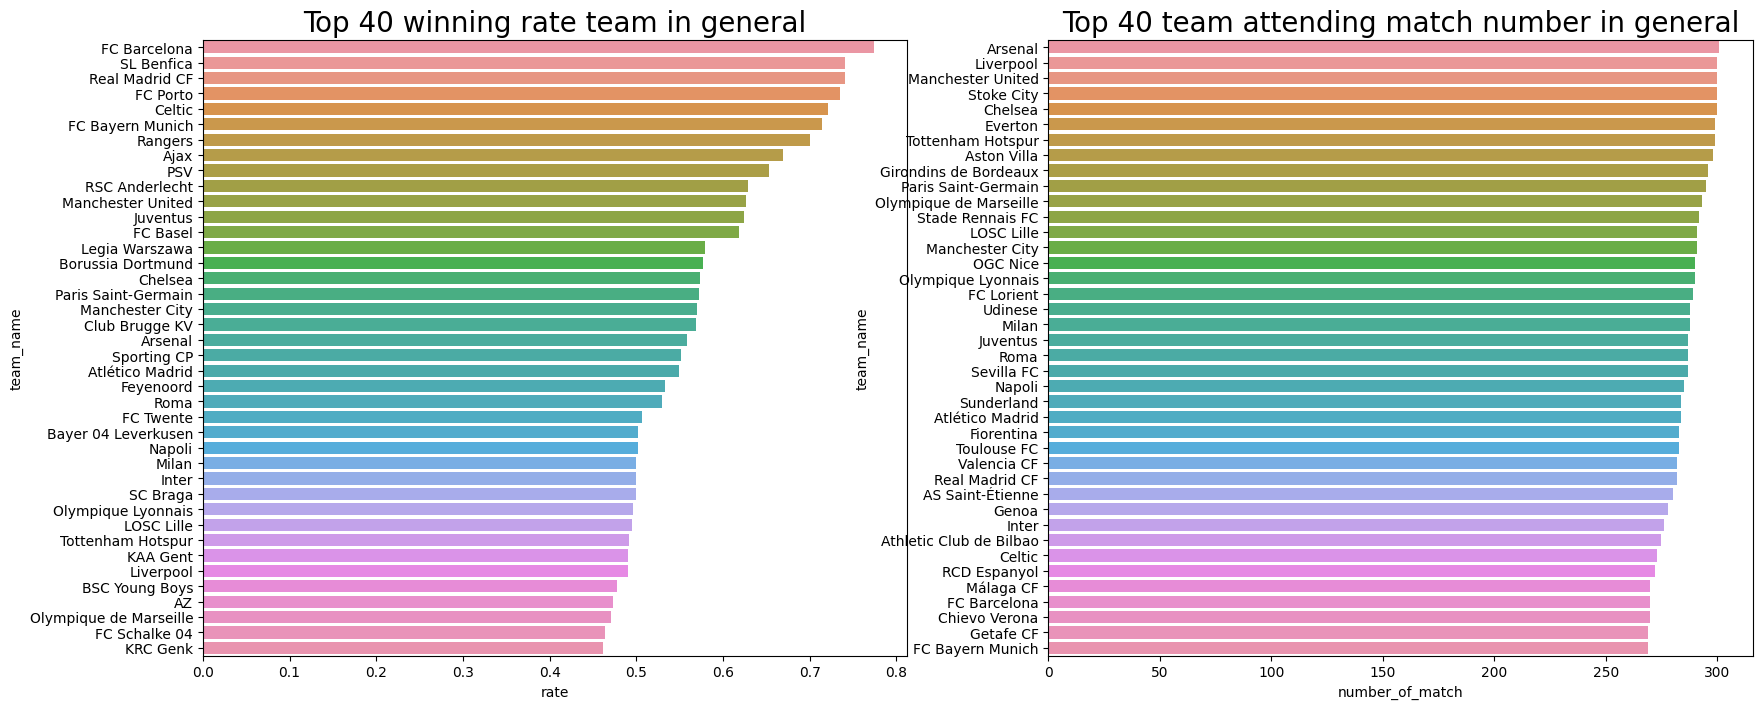

In [67]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot(win_dist.sort_values(by=['rate'],ascending=False).iloc[0:40,:],y='team_name',x="rate",ax=axes[0])
sns.barplot(win_dist.sort_values(by=['number_of_match'],ascending=False).iloc[0:40,:],y='team_name',x="number_of_match",ax=axes[1])

axes[0].set_title("Top 40 winning rate team in general", fontsize = 20)
axes[1].set_title("Top 40 team attending match number in general", fontsize = 20)

The above plot show the winning rate of each team. The team "FC Barcelona" has the highest winning rate,while the number of match among these team are similar

In [68]:
top=win_dist.sort_values(by=['rate'],ascending=False).iloc[0,:]
last=win_dist.sort_values(by=['rate'],ascending=False).iloc[-1,:]
top

team_name             FC Barcelona
rate                      0.774074
number_of_match                270
league             Spain LIGA BBVA
Name: 52, dtype: object

In [69]:
top_id=team[team.team_long_name==top.team_name].reset_index()["team_api_id"][0]
last_id=team[team.team_long_name==last.team_name].reset_index()["team_api_id"][0]

top_attr= team_attr[team_attr.team_api_id==top_id]
top_attr["team_name"]= top.team_name
last_attr=team_attr[team_attr.team_api_id==last_id]
last_attr["team_name"]= last.team_name


<ipython-input-69-07a4dbdc996d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_attr["team_name"]= top.team_name
<ipython-input-69-07a4dbdc996d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_attr["team_name"]= last.team_name


<ipython-input-70-a7811cdc69f4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comb=comb.groupby("team_name").mean()[['buildUpPlaySpeed',


Text(0.5, 1.0, 'Comparison between the numberical measurement of team attributes of top team and buttom team.')

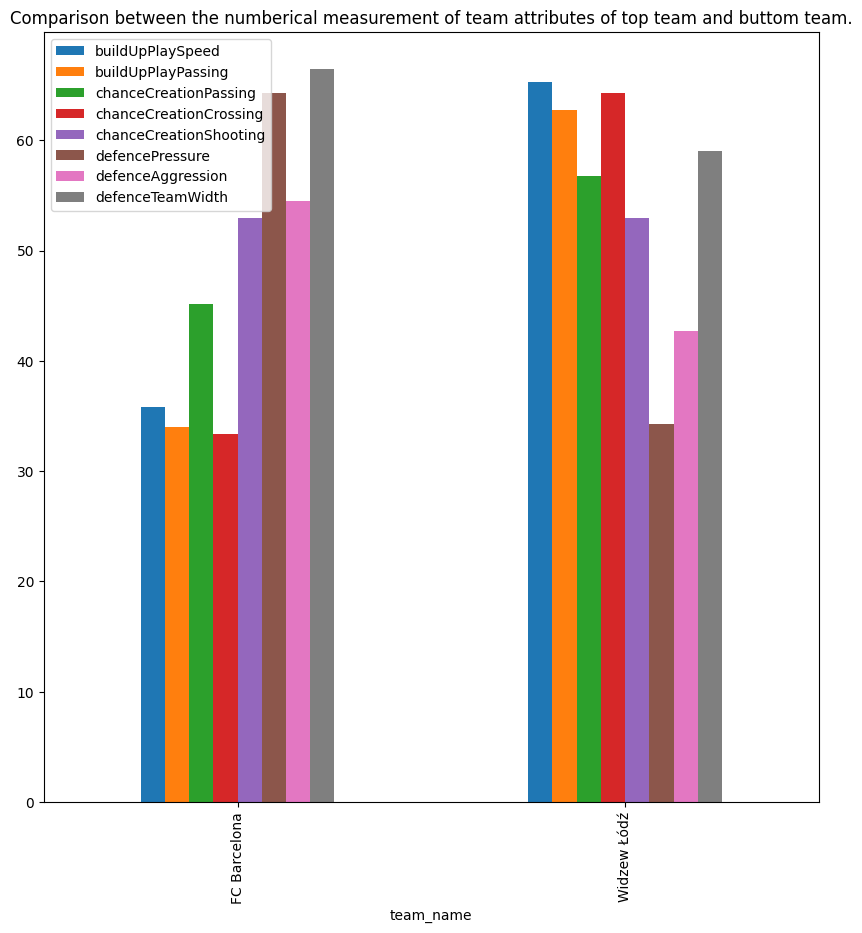

In [70]:
comb=pd.concat([top_attr,last_attr])
comb=comb.groupby("team_name").mean()[['buildUpPlaySpeed',
                                         'buildUpPlayPassing','chanceCreationPassing',
                                         'chanceCreationCrossing', 'chanceCreationShooting',
                                         'defencePressure', 'defenceAggression', 'defenceTeamWidth']].plot(kind = "bar",figsize=(10,10))
plt.title('Comparison between the numberical measurement of team attributes of top team and buttom team.')

From the comparison of top team and buttom team, it shows there are significant difference on the feature,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationCrossing,defencePressure. It is reasonable to assume these feature are correlated to the game result

##### compare the team in the corresponding league group

In [71]:
league_win=win_dist.groupby("league").value_counts().reset_index().drop([0],axis=1)
league_win

league             team_name      rate  number_of_match
0      Belgium Jupiler League          Beerschot AC  0.247525              101
1      Belgium Jupiler League        Club Brugge KV  0.568862              167
2      Belgium Jupiler League           KV Oostende  0.439394               66
3      Belgium Jupiler League  Royal Excel Mouscron  0.215686               51
4      Belgium Jupiler League        RSC Anderlecht  0.628743              167
..                        ...                   ...       ...              ...
283  Switzerland Super League              FC Basel  0.618474              249
284  Switzerland Super League              FC Aarau  0.214953              107
285  Switzerland Super League        BSC Young Boys  0.477733              247
286  Switzerland Super League         AC Bellinzona  0.225352               71
287  Switzerland Super League           Servette FC  0.294118               68

[288 rows x 4 columns]

In [72]:
le_list= list(win_dist["league"].value_counts().to_dict().keys())
le_list

['France Ligue 1',
 'England Premier League',
 'Spain LIGA BBVA',
 'Italy Serie A',
 'Germany 1. Bundesliga',
 'Portugal Liga ZON Sagres',
 'Netherlands Eredivisie',
 'Belgium Jupiler League',
 'Poland Ekstraklasa',
 'Scotland Premier League',
 'Switzerland Super League']

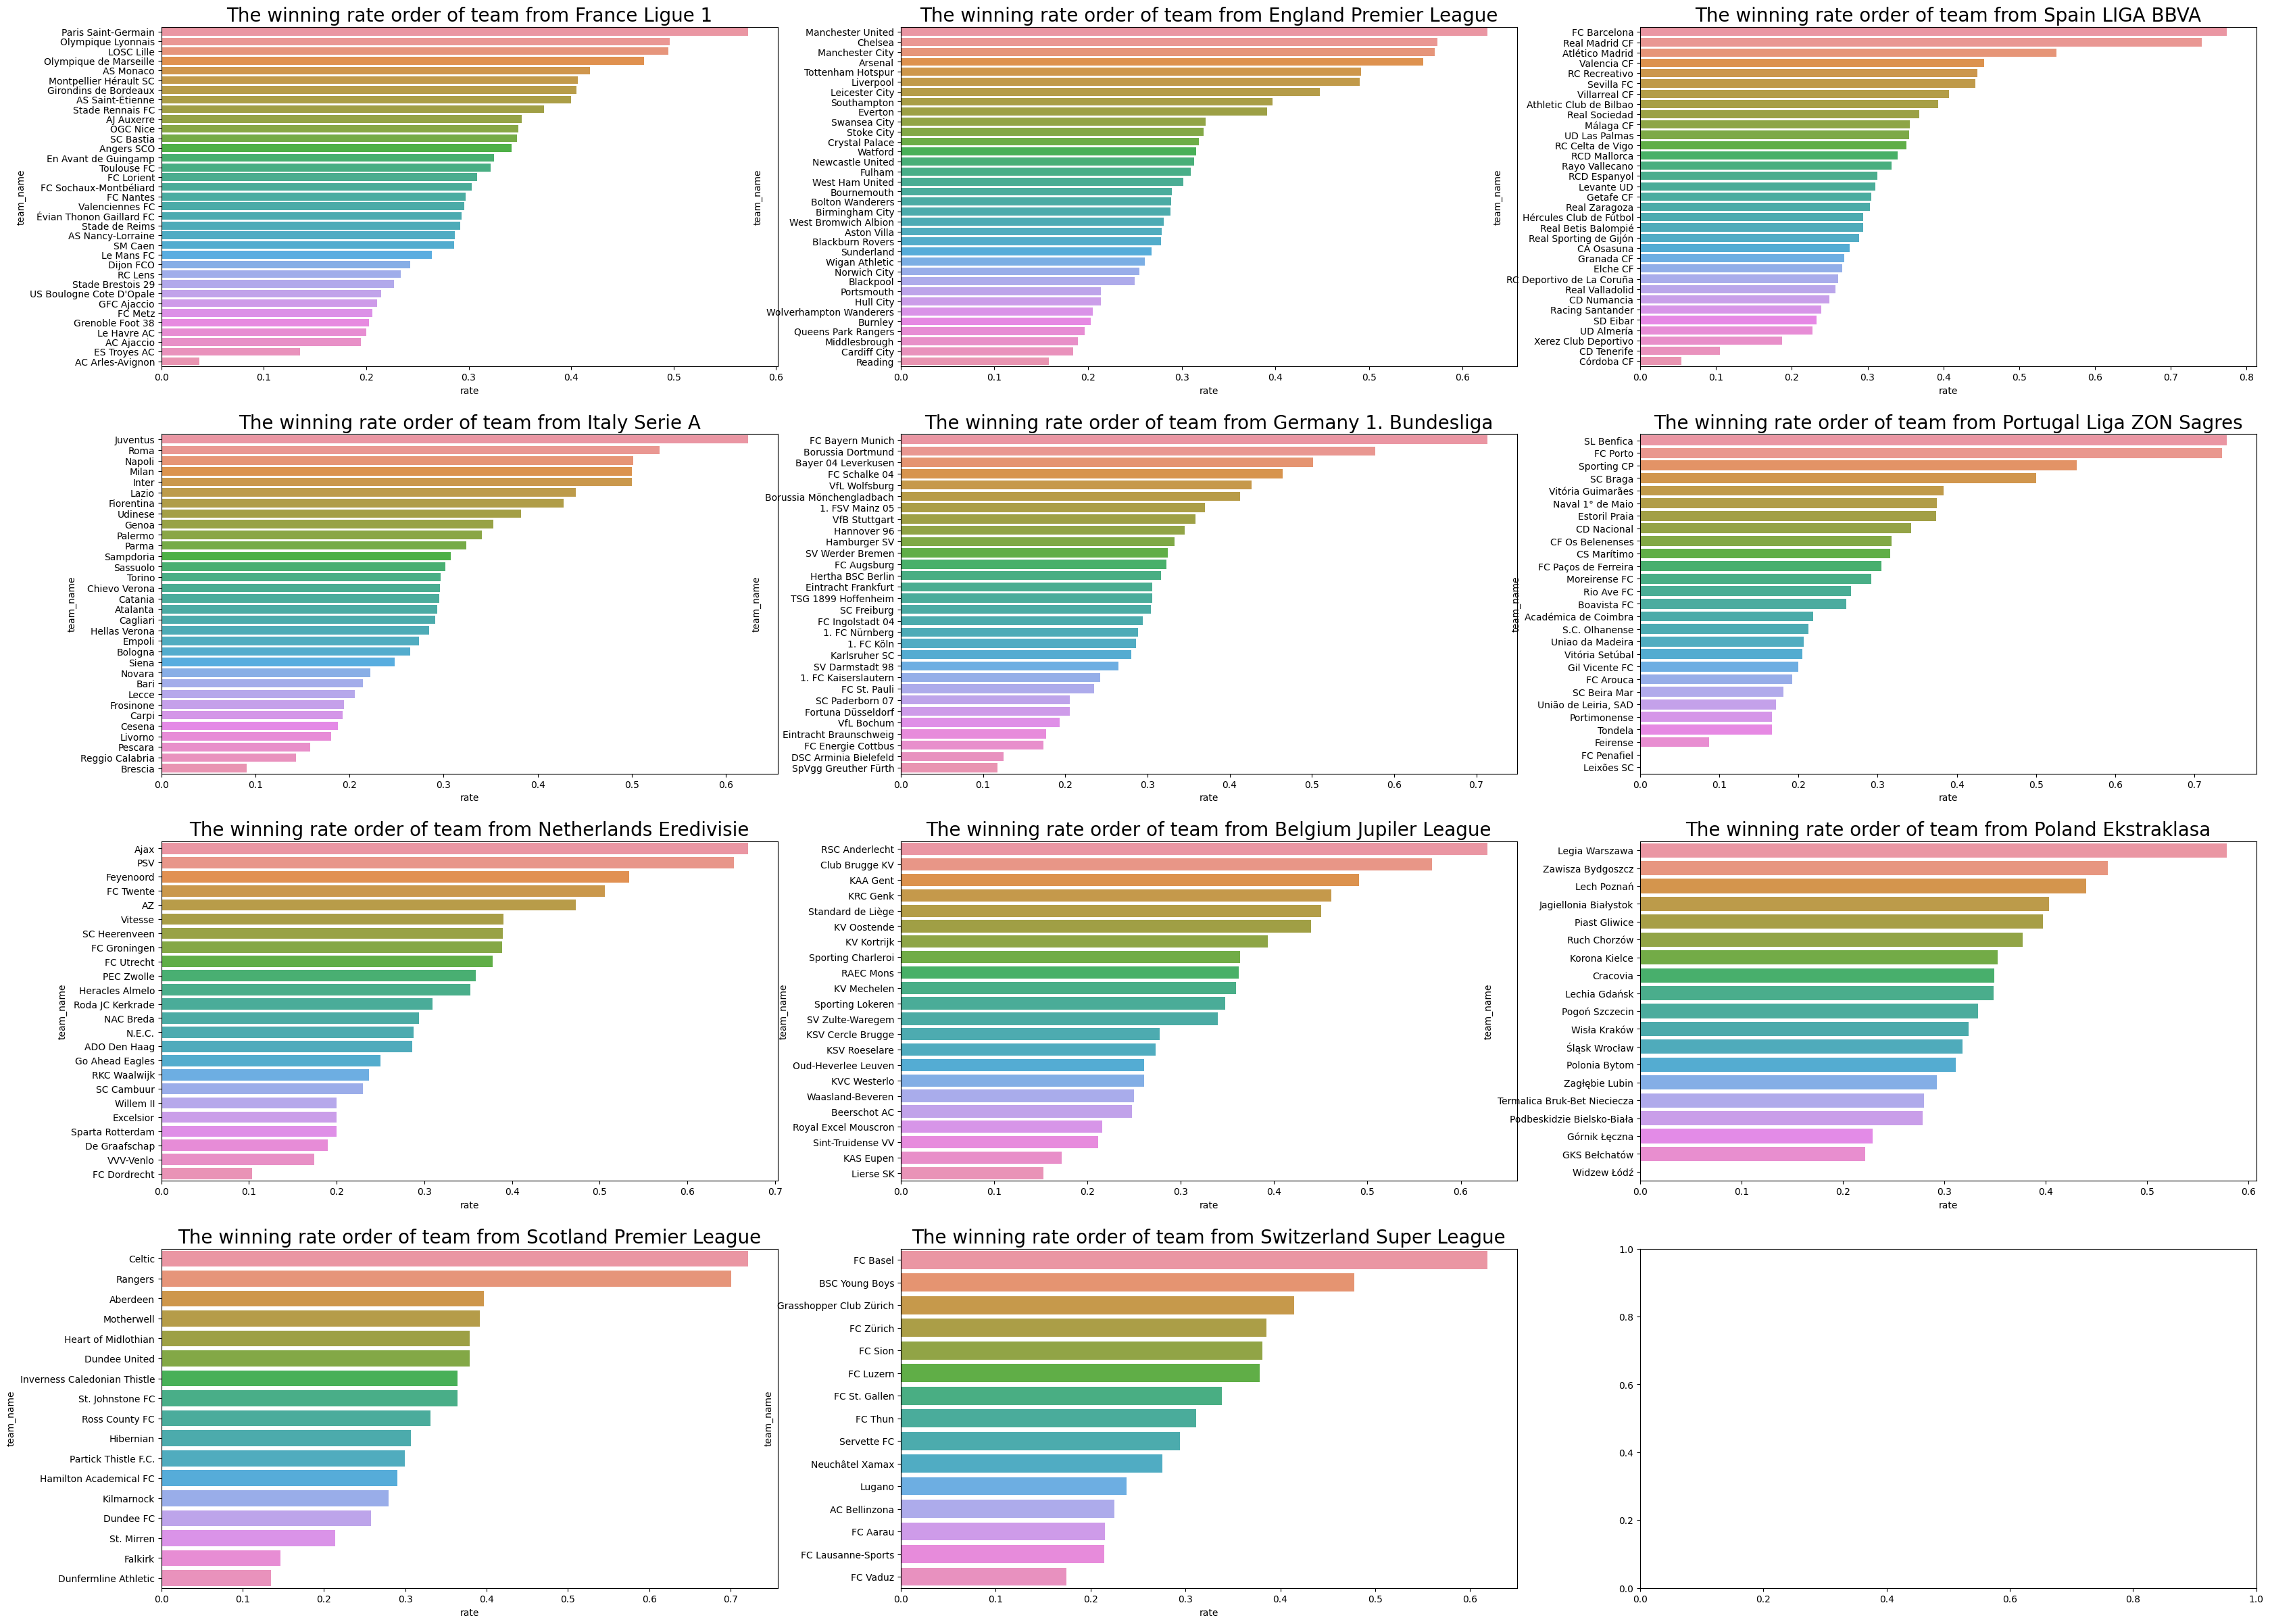

In [73]:
fig, axes = plt.subplots(4, 3, figsize = (40, 30))
Top_team={}
buttom_team={}
for i in range(len(le_list)):
  league_name= le_list[i]
  target_set= win_dist[win_dist.league== league_name].sort_values(by=['rate'],ascending=False)
  Top_team[league_name]= target_set.iloc[0,:]
  buttom_team[league_name]= target_set.iloc[-1,:]
  sns.barplot(target_set,y='team_name',x="rate",ax=axes[int(i/3),i%3])
  axes[int(i/3),i%3].set_title("The winning rate order of team from "+league_name, fontsize = 20)

As the plot given above, we can see there are large difference of winnning rate between the top team and buttom team from each league. Thus, it seems to be resonable to explore the team attribute of top team and buttom team in order to find out useful feature 

In [74]:
Top_team=pd.DataFrame(Top_team).T
Top_team

team_name      rate number_of_match  \
France Ligue 1            Paris Saint-Germain  0.572881             295   
England Premier League      Manchester United  0.626667             300   
Spain LIGA BBVA                  FC Barcelona  0.774074             270   
Italy Serie A                        Juventus  0.623693             287   
Germany 1. Bundesliga        FC Bayern Munich  0.713755             269   
Portugal Liga ZON Sagres           SL Benfica  0.741176             170   
Netherlands Eredivisie                   Ajax  0.669492             236   
Belgium Jupiler League         RSC Anderlecht  0.628743             167   
Poland Ekstraklasa             Legia Warszawa  0.578947              76   
Scotland Premier League                Celtic  0.721612             273   
Switzerland Super League             FC Basel  0.618474             249   

                                            league  
France Ligue 1                      France Ligue 1  
England Premier League      England Premier League  
Spain LIGA BBVA                    Spain LIGA BBVA  
Italy Serie A                        Italy Serie A  
Germany 1. Bundesliga        Germany 1. Bundesliga  
Portugal Liga ZON Sagres  Portugal Liga ZON Sagres  
Netherlands Eredivisie      Netherlands Eredivisie  
Belgium Jupiler League      Belgium Jupiler League  
Poland Ekstraklasa              Poland Ekstraklasa  
Scotland Premier League    Scotland Premier League  
Switzerland Super League  Switzerland Super League

In [75]:
buttom_team=pd.DataFrame(buttom_team).T
buttom_team

team_name      rate number_of_match  \
France Ligue 1                AC Arles-Avignon  0.037037              27   
England Premier League                 Reading  0.157895              38   
Spain LIGA BBVA                     Córdoba CF  0.054054              37   
Italy Serie A                          Brescia  0.090909              11   
Germany 1. Bundesliga     SpVgg Greuther Fürth  0.117647              34   
Portugal Liga ZON Sagres            Leixões SC         0               5   
Netherlands Eredivisie            FC Dordrecht  0.103448              29   
Belgium Jupiler League               Lierse SK  0.153061              98   
Poland Ekstraklasa                 Widzew Łódź         0               4   
Scotland Premier League   Dunfermline Athletic  0.135135              37   
Switzerland Super League              FC Vaduz  0.174603              63   

                                            league  
France Ligue 1                      France Ligue 1  
England Premier League      England Premier League  
Spain LIGA BBVA                    Spain LIGA BBVA  
Italy Serie A                        Italy Serie A  
Germany 1. Bundesliga        Germany 1. Bundesliga  
Portugal Liga ZON Sagres  Portugal Liga ZON Sagres  
Netherlands Eredivisie      Netherlands Eredivisie  
Belgium Jupiler League      Belgium Jupiler League  
Poland Ekstraklasa              Poland Ekstraklasa  
Scotland Premier League    Scotland Premier League  
Switzerland Super League  Switzerland Super League

In [76]:
# extract the year from date 
team_attr['date'] = pd.DatetimeIndex(team_attr['date']).year

In [77]:
team_attr.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

Since there are 969 missing value from buildUpPlayDribbling column, it is safe to delete the column

In [78]:
team_attr= team_attr.drop('buildUpPlayDribbling', axis=1)

In [79]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   int64 
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

In [80]:
Match.columns

Index(['id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2',
       'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA', 'name', 'country', 'League', 'home_form',
       'away_form', 'result', 'home_score', 'away_score'],
      dtype='object')

In [81]:
team_score_dist=Match[["home_team_api_id",'away_team_api_id','League','result', 'home_score', 'away_score']]
team_score_dist

home_team_api_id  away_team_api_id                    League result  \
145                8203              9987    Belgium Jupiler League   HOME   
153                9984              8342    Belgium Jupiler League   AWAY   
155                8635             10000    Belgium Jupiler League   HOME   
162                8203              8635    Belgium Jupiler League   HOME   
168               10000              9999    Belgium Jupiler League   DRAW   
...                 ...               ...                       ...    ...   
25972             10243             10191  Switzerland Super League   DRAW   
25974             10190             10191  Switzerland Super League   HOME   
25975              9824             10199  Switzerland Super League   AWAY   
25976              9956             10179  Switzerland Super League   HOME   
25978             10192              9931  Switzerland Super League   HOME   

       home_score  away_score  
145         639.0       663.0  
153         689.0       710.0  
155         723.0       639.0  
162         641.0       727.0  
168         654.0       639.0  
...           ...         ...  
25972       605.0       625.0  
25974       602.0       620.0  
25975       619.0       618.0  
25976       642.0       650.0  
25978       656.0       648.0  

[21374 rows x 6 columns]

In [82]:
team_score_dist= pd.merge(team_score_dist, home_team_name, how='inner', on = 'home_team_api_id')
team_score_dist= pd.merge(team_score_dist, away_team_name, how='inner', on = 'away_team_api_id')
team_score_dist=team_score_dist.drop(["home_team_api_id","away_team_api_id"],axis=1)
team_score_dist

League result  home_score  away_score  \
0        Belgium Jupiler League   HOME       639.0       663.0   
1        Belgium Jupiler League   DRAW       666.0       666.0   
2        Belgium Jupiler League   HOME       661.0       652.0   
3        Belgium Jupiler League   HOME       647.0       666.0   
4        Belgium Jupiler League   HOME       637.0       675.0   
...                         ...    ...         ...         ...   
21369  Switzerland Super League   AWAY       662.0       618.0   
21370  Switzerland Super League   DRAW       627.0       628.0   
21371  Switzerland Super League   DRAW       613.0       618.0   
21372  Switzerland Super League   DRAW       631.0       627.0   
21373  Switzerland Super League   HOME       597.0       603.0   

           home_team_long_name away_team_long_name  
0                  KV Mechelen            KRC Genk  
1                  KV Mechelen            KRC Genk  
2                  KV Mechelen            KRC Genk  
3                  KV Mechelen            KRC Genk  
4                  KV Mechelen            KRC Genk  
...                        ...                 ...  
21369  Grasshopper Club Zürich              Lugano  
21370                 FC Vaduz              Lugano  
21371                 FC Vaduz              Lugano  
21372            FC St. Gallen              Lugano  
21373                  FC Thun              Lugano  

[21374 rows x 6 columns]

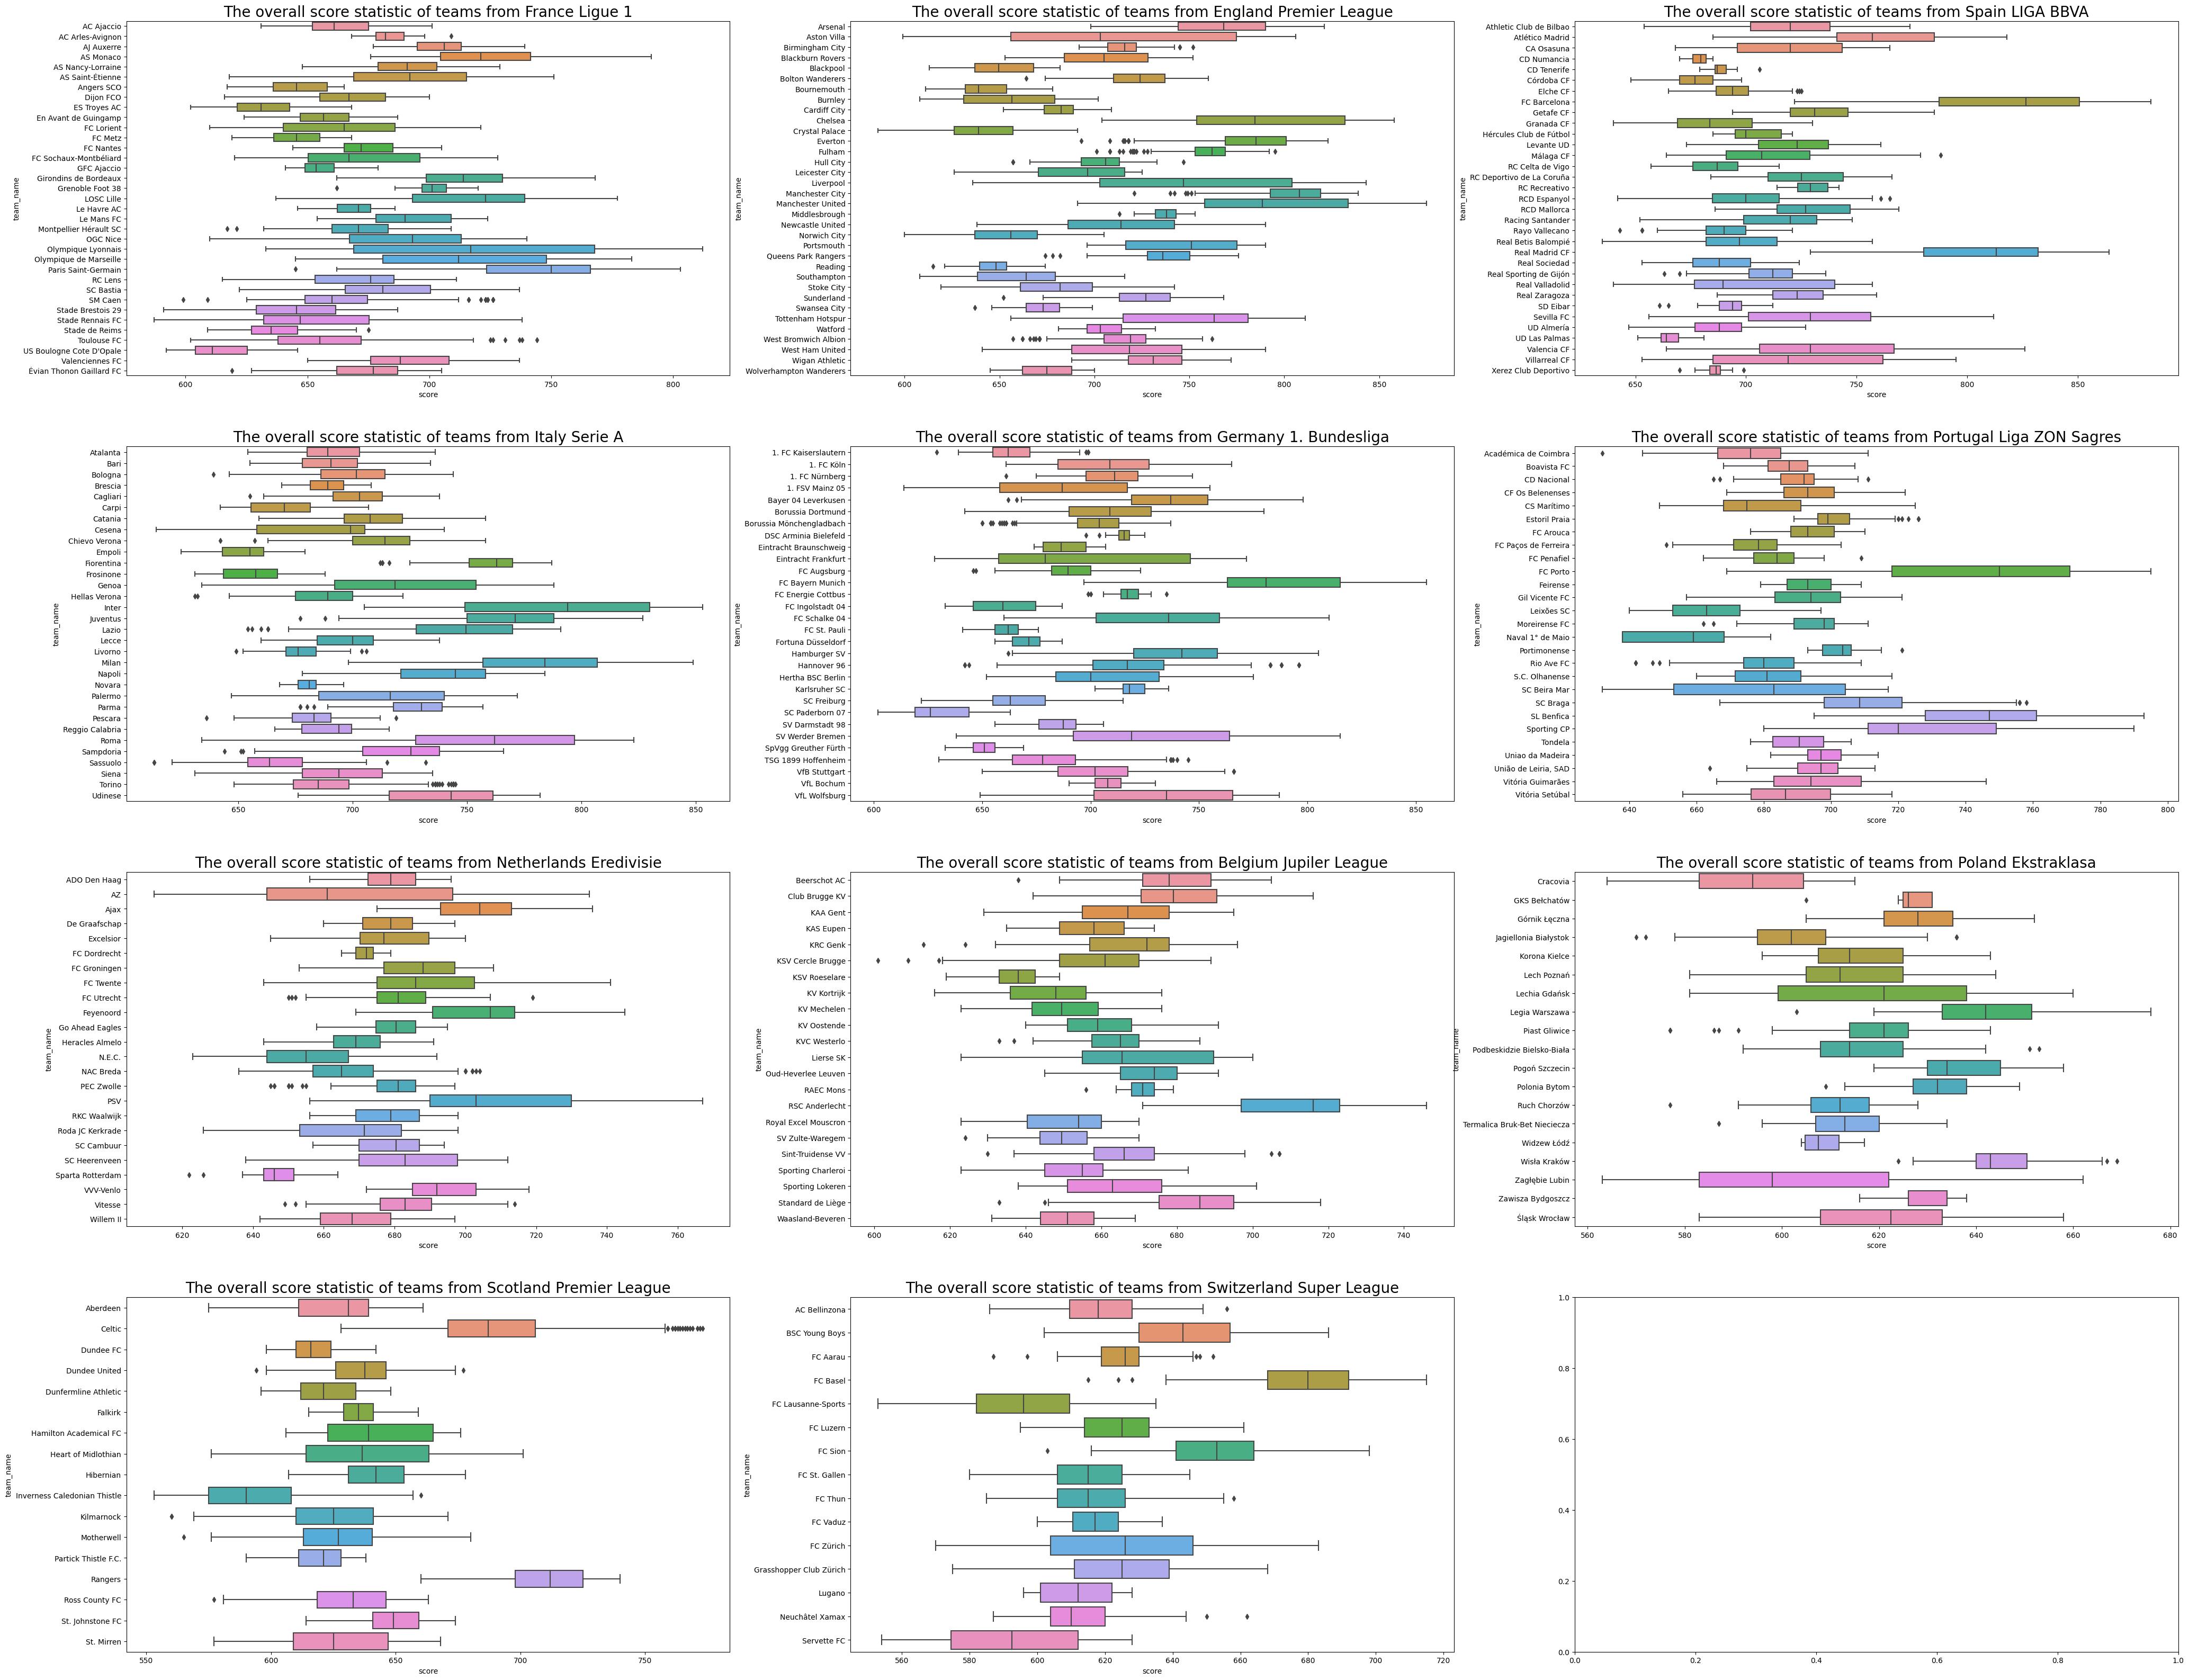

In [83]:
fig, axes = plt.subplots(4, 3, figsize = (50, 40))
for i in range(len(le_list)):
    target= team_score_dist[team_score_dist.League== le_list[i]]
    team_home_score=target[["home_team_long_name","home_score"]]
    team_away_score=target[["away_team_long_name","away_score"]]
    target_team_names= np.union1d(target["home_team_long_name"].unique(),target["away_team_long_name"].unique())
    concate_score= pd.DataFrame()
    for j in target_team_names:
      first= team_home_score[team_home_score.home_team_long_name==j ]
      first.columns= ["team_name","score"]
      second= team_away_score[team_away_score.away_team_long_name==j ]
      second.columns= ["team_name","score"]
      concate_score=pd.concat([concate_score, first], axis=0)
      concate_score=pd.concat([concate_score, second], axis=0)
    sns.boxplot(concate_score,x="score",y="team_name",ax=axes[int(i/3),i%3])
    axes[int(i/3),i%3].set_title("The overall score statistic of teams from "+le_list[i], fontsize = 20)


# Model 